In [1]:
%load_ext autoreload
%autoreload 2

from pdac_utils import *

import numpy as np
import pandas as pd
import scanpy as sc

from anndata import AnnData
from glob import glob
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF

import seaborn as sns
import scplot as scp

from collections import defaultdict
from scipy.stats import ttest_ind

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

import warnings

import pandas as pd
import pickle as pkl

import seaborn as sns

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

In [2]:
from scipy.stats import ks_2samp

In [3]:
combinenaivedata = sc.read("/ahg/regevdata/projects/Pancreas/cellbender/processed/totaldata-clean-infercnv-annotated.h5ad")
malignant = sc.read('/ahg/regevdata/projects/Pancreas/src/cNMF/naive_tumor_cNMF/tumor_nmf.h5ad')
fibro = sc.read('/ahg/regevdata/projects/Pancreas/src/cNMF/naive_fibroblast_cNMF/fibroblast_nmf.h5ad')

In [4]:
response_df = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/treatment_response.txt', sep='\t')
response_df = dict([(p, k) for p, k in zip(response_df['pid'], response_df['group'])])

In [5]:
other_topics  = ['CRTln', 'CRTn', 'CRTx', 'GART', 'RT']

In [7]:
combinenaivedata.obs['new_treatment'] = ['Other' if treatment in other_topics else treatment for treatment in combinenaivedata.obs.treatment_status]

In [8]:
combinenaivedata = combinenaivedata[combinenaivedata.obs['new_treatment']!='Healthy']
combinenaivedata = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='REMOVE']
combinenaivedata = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='None']

pid_transform = {'MGH2675':'T13',
                 '003':'U15',
                 '004':'U18',
                 '007':'U2',
                 '008':'T22',
                 '009':'T20',
                '010T':'U12',
                '011':'U9',
                '2083':'T4',
                '2100':'T2',
                '2223':'T17',
                '2229':'T18',
                '2276':'U4',
                '2364':'U5',
                '2376':'U1',
                '2443':'U10',
                '2462':'T16',
                '2490':'U11',
                '2498':'U7',
                '2507':'T25',
                '2523':'U3',
                '2540':'T6',
                '2591':'U13',
                '2603':'U6',
                '2626':'U16',
                '2634':'T5',
                '2664':'U14',
                '2667':'T23',
                '2668':'T7',
                '2675':'T13',
                'MGH2076':'T9',
                'MGH2101':'T8',
                'MGH2381':'T19',
                'MGHR1':'T14',
                'MGHR2':'T15',
                'MGHR3':'T3',
                'MGHR5':'T1',
                'MGHR6':'T10',
                'MGHR7':'T12',
                'MGHR8':'T24',
                'MGHR9':'T21',
                'MGHR11':'T11',
                'MGHR16':'U17',
                'MGHR17':'U8'}

combinenaivedata.obs['pid'] = [pid_transform.get(pid, pid) for pid in combinenaivedata.obs.pid]
combinenaivedata.obs['response'] = [response_df.get(pid) for pid in combinenaivedata.obs.pid]

/home/unix/kjag/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


In [9]:
combinenaivedata.obs['Level 2 Annotation'] = ['CAF' if ct=='iCAF' else ct for ct in combinenaivedata.obs['Level 2 Annotation']]
combinenaivedata.obs['Level 2 Annotation'] = ['CD8+ T' if ct=='T (MT high)' else ct for ct in combinenaivedata.obs['Level 2 Annotation']]
combinenaivedata.obs['Level 3 Annotation'] = ['CD8+ T' if ct=='T (MT high)' else ct for ct in combinenaivedata.obs['Level 3 Annotation']]
combinenaivedata.obs['Level 3 Annotation'] = ['CAF' if ct=='iCAF' else ct for ct in combinenaivedata.obs['Level 3 Annotation']]
combinenaivedata.obs['Level 2 Annotation'] = ['Malignant' if ct=='Epithelial (malignant)' else ct for ct in combinenaivedata.obs['Level 2 Annotation']]
combinenaivedata.obs['Level 3 Annotation'] = ['Malignant' if ct=='Epithelial (malignant)' else ct for ct in combinenaivedata.obs['Level 3 Annotation']]

In [10]:
combinenaivedata.write('/ahg/regevdata/projects/Pancreas/cellbender/processed/totaldata-final.h5ad')

... storing 'pid' as categorical
... storing 'Level 2 Annotation' as categorical
... storing 'Level 3 Annotation' as categorical
... storing 'new_treatment' as categorical
... storing 'response' as categorical


In [16]:
for col in combinenaivedata.obs.columns:
    if col.startswith('leiden_') or col.startswith('pct_counts'):
        del combinenaivedata.obs[col]

pct_counts_in_top_5_genes
pct_counts_in_top_10_genes
pct_counts_in_top_20_genes
pct_counts_in_top_50_genes
pct_counts_in_top_100_genes
pct_counts_in_top_200_genes
pct_counts_in_top_500_genes
leiden_v2
leiden_v3
leiden_v4
leiden_v5
leiden_v6
leiden_v7
leiden_v8
leiden_v9


In [ ]:
for col in combinenaivedata.obs.columns:
    if col.startswith('leiden_') or col.startswith('pct_counts'):
        del combinenaivedata.obs[col]

In [ ]:
for col in combinenaivedata.var.columns:
    if '-' in col:
        del combinenaivedata.var[col]

In [28]:
combinenaivedata.write('/ahg/regevdata/projects/Pancreas/cellbender/processed/totaldata-final-toshare.h5ad')

<ipython-input-9-e2fc4048eeba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIN1'] = subset.obs_vector('PIN1')


<AxesSubplot:xlabel='Level 1 Annotation', ylabel='PIN1'>

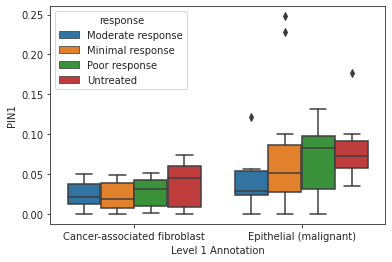

In [9]:
subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation']=='Epithelial (malignant)') | (combinenaivedata.obs['Level 1 Annotation']=='Cancer-associated fibroblast')]
df = subset.obs[['pid', 'response', 'Level 1 Annotation']]
df['PIN1'] = subset.obs_vector('PIN1')
df = df.groupby(['pid', 'Level 1 Annotation']).agg({'response':'first', 'PIN1':'mean'})
df = df.reset_index()
sns.boxplot(x=df['Level 1 Annotation'], y=df['PIN1'], hue=df['response'])

In [10]:
# compute heterogeneity of samples by compartment

In [11]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [12]:
adjusted_mutual_info_score(malignant.obs.leiden, malignant.obs.pid)

0.867725331371744

In [13]:
adjusted_mutual_info_score(combinenaivedata[combinenaivedata.obs["Level 1 Annotation"]!='Malignant'].obs.leiden, combinenaivedata[combinenaivedata.obs["Level 1 Annotation"]!='Malignant'].obs.pid)

/home/unix/kjag/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


0.17475720508197193

# paga analysis of epithelial cells

/home/unix/kjag/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
computing PCA
    with n_comps=50
    finished (0:01:32)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:13)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99971026 0.99968135 0.99962366 0.9995093  0.9993613
     0.99886644 0.99855775 0.99833786 0.9982695  0.9976875  0.9975321
     0.99741197 0.99683607 0.9965795 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00

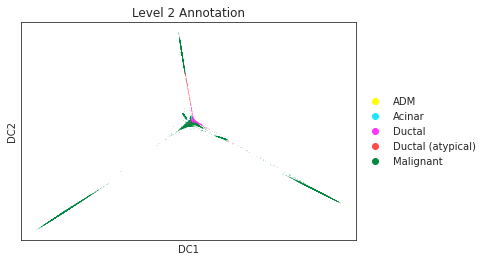

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:03)


In [14]:
ductalrelatedadata = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation']=='Epithelial (non-malignant)')| (combinenaivedata.obs['Level 1 Annotation']=='Epithelial (malignant)')]

paga_palette = ['#a74949', '#8c448d', '#4c83bb', '#7cb8d4','#9fb36b']

sc.tl.pca(ductalrelatedadata)
sc.pp.neighbors(ductalrelatedadata)
sc.tl.diffmap(ductalrelatedadata, n_comps=15)
sc.pl.diffmap(ductalrelatedadata, color='Level 2 Annotation')
sc.tl.paga(ductalrelatedadata, groups='Level 2 Annotation')

--> added 'pos', the PAGA positions (adata.uns['paga'])


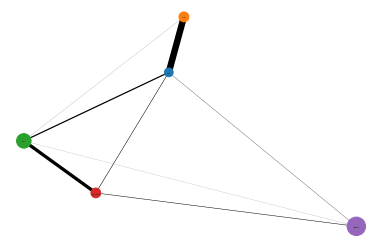

In [15]:
paga_palette = ['#a74949', '#8c448d', '#4c83bb', '#7cb8d4','#9fb36b']
sc.pl.paga(ductalrelatedadata, color=['Level 2 Annotation'], node_size_scale = .6,  frameon=False, fontsize = 0, save = 'paga.pdf')

--> added 'pos', the PAGA positions (adata.uns['paga'])


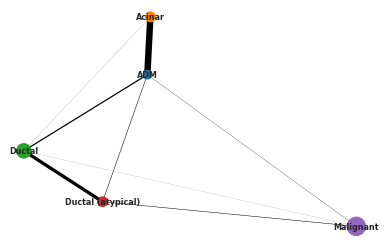

--> added 'pos', the PAGA positions (adata.uns['paga'])


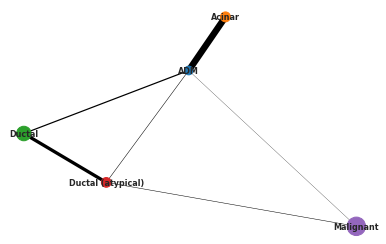

--> added 'pos', the PAGA positions (adata.uns['paga'])


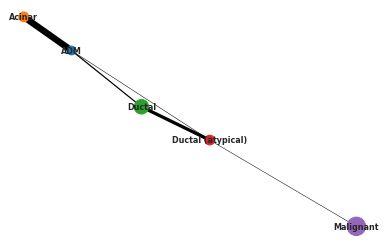

--> added 'pos', the PAGA positions (adata.uns['paga'])


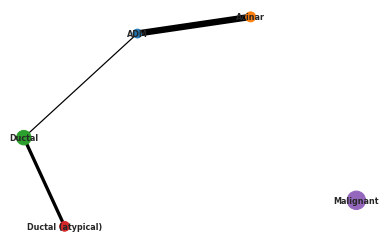

--> added 'pos', the PAGA positions (adata.uns['paga'])


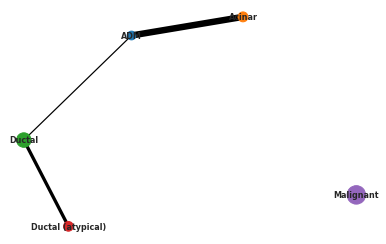

--> added 'pos', the PAGA positions (adata.uns['paga'])


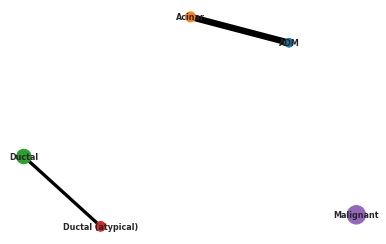

--> added 'pos', the PAGA positions (adata.uns['paga'])


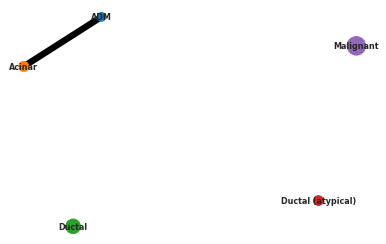

--> added 'pos', the PAGA positions (adata.uns['paga'])


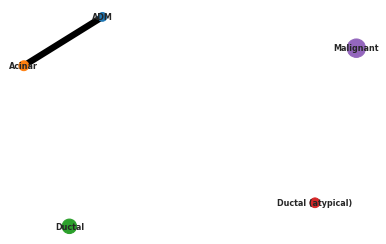

In [50]:
for t in [.01, .02, .06, .07, .16, .35, .44, .8]:
    sc.pl.paga(ductalrelatedadata,threshold=t, node_size_scale = .6,  frameon=False, fontsize = 8, )

# process the malignant state topics

In [14]:
malignant_statetopic_map = {6:'Cycling (S)',
7:'Ribosomal',
16:'malignant_Adhesive',
21:'Interferon signaling',
22:'Cycling (G2/M)',
27:'TNF-NFkB signaling',
34:'MYC signaling',
                      }

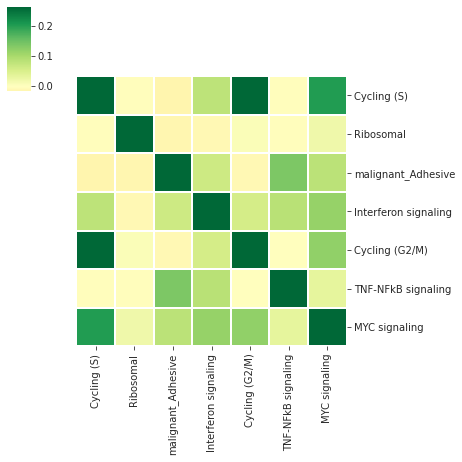

In [15]:
df = pd.DataFrame(malignant.obsm['usage_nmf49'])
state_topics = [6,7,16,21,22,27,34]
df = df[state_topics]
df.columns = [malignant_statetopic_map.get(col) for col in df.columns]

sns_plot = sns.clustermap(df.corr(),cmap="RdYlGn", linewidths = 1, linecolor='white', row_cluster = False, col_cluster = False, figsize=(6.5, 6.5), vmin= -0.017, vmax = 0.264, center = 0)
sns_plot.ax_row_dendrogram.set_visible(False)
sns_plot.ax_col_dendrogram.set_visible(False)
sns_plot.savefig("malignant_state_program_correlations.pdf")

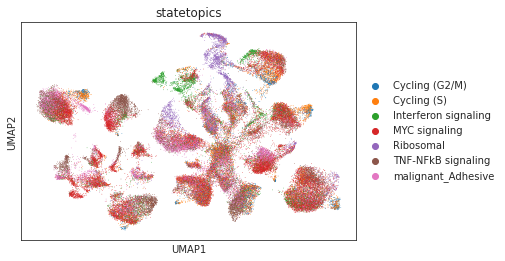

In [31]:
for col in df.columns:
    malignant.obs[col] = list(df[col])
    combinenaivedata.obs[col] = malignant.obs[col]
    
malignant.obs['statetopics'] = [i for i in df.idxmax(axis=1)]
malignant.obs['statetopics'] = malignant.obs['statetopics'].astype('category')
sc.pl.umap(malignant, color='statetopics')
combinenaivedata.obs['statetopics'] = malignant.obs['statetopics']
combinenaivedata.obs['statetopics'] = [t if ct=='Epithelial (malignant)' else 'ZZ Non malignant' for t, ct in zip(combinenaivedata.obs['statetopics'], combinenaivedata.obs['Level 1 Annotation'])]
#display(scp.composition_plot(combinenaivedata, 'new_treatment', 'statetopics', height=450))

# process the malignant state topics condensed

In [16]:
state_df = df.copy()

In [16]:
malignant_condensed_statetopic_map = {6:'cycling_topic', 7:'non-cycling_topic'}

In [17]:
state1 = ['Cycling (S)', 'Cycling (G2/M)', 'MYC signaling']
state2 = ['Ribosomal', 'malignant_Adhesive', 'Interferon signaling', 'TNF-NFkB signaling']

(64655, 2)


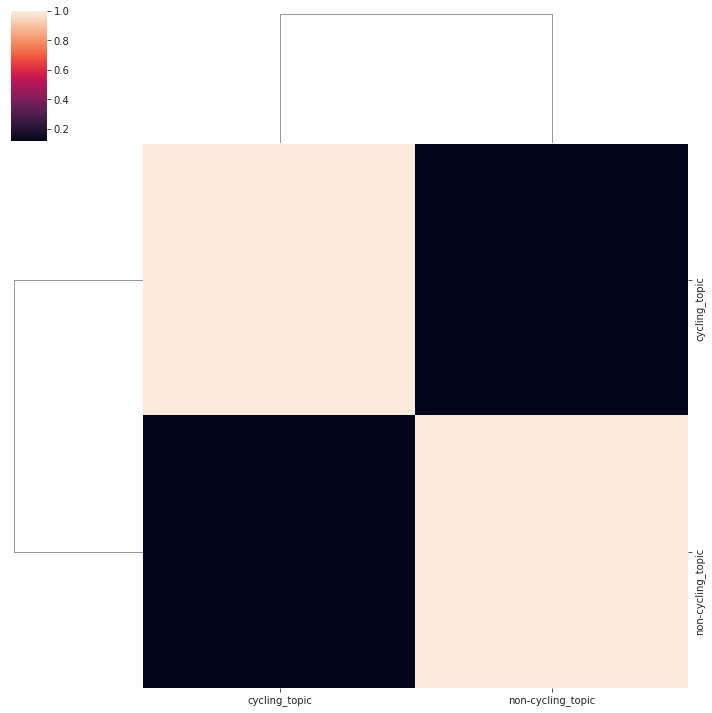

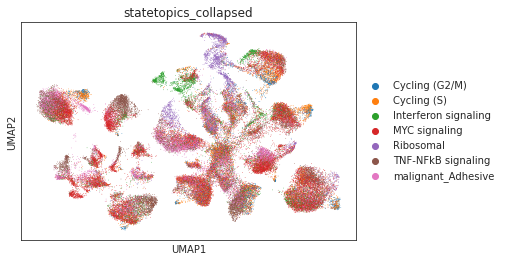

In [18]:
# 
df = pd.DataFrame(malignant.obsm['usage_nmf49'])
state_topics = [6,7,16,21,22,27,34]
df = df[state_topics]
df.columns = [malignant_statetopic_map.get(col) for col in df.columns]

dfstate1 = df[state1]
malignant.obs['cycling_topic'] = [i for i in dfstate1.max(axis=1)]

dfstate2 = df[state2]
malignant.obs['non-cycling_topic'] = [i for i in dfstate2.max(axis=1)]

df = pd.concat([malignant.obs['cycling_topic'], malignant.obs['non-cycling_topic']], axis=1)

print(df.shape)
sns.clustermap(df.corr())

for col in df.columns:
    malignant.obs[col] = list(df[col])
    combinenaivedata.obs[col] = malignant.obs[col]
    
malignant.obs['statetopics_collapsed'] = [i for i in df.idxmax(axis=1)]
malignant.obs['statetopics_collapsed'] = malignant.obs['statetopics'].astype('category')
sc.pl.umap(malignant, color='statetopics_collapsed')
combinenaivedata.obs['statetopics_collapsed'] = malignant.obs['statetopics_collapsed']
combinenaivedata.obs['statetopics_collapsed'] = [t if ct=='Epithelial (malignant)' else 'ZZ Non malignant' for t, ct in zip(combinenaivedata.obs['statetopics'], combinenaivedata.obs['Level 1 Annotation'])]   
#display(scp.composition_plot(combinenaivedata, 'new_treatment', 'statetopics_collapsed', height=450))

# process the malignant lineage topics

In [17]:
malignant_lineagetopic_map = {9:'Neuroendocrine-like',
17:'Mesenchymal',
31:'Classical-like',
33:'Acinar-like',
42:'Neuronal-like',
46:'Basaloid',
47:'Squamoid',}

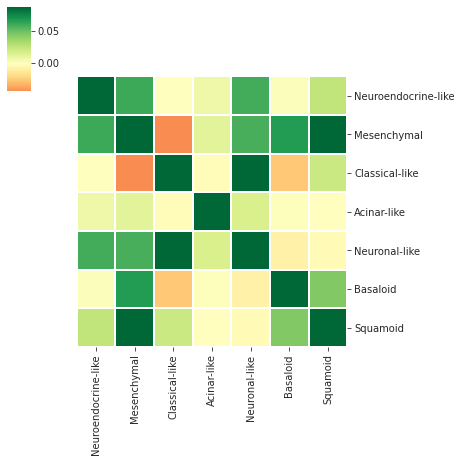

In [18]:
df = pd.DataFrame(malignant.obsm['usage_nmf49'])
lineage_topics = [9,17,31,33,42,46,47]
df = df[lineage_topics]
df.columns = [malignant_lineagetopic_map.get(col) for col in df.columns]
sns_plot = sns.clustermap(df.corr(),cmap="RdYlGn", linewidths = 1, linecolor='white', row_cluster = False, col_cluster = False, figsize=(6.5, 6.5), vmin= -0.0441, vmax = 0.0881, center = 0)
sns_plot.ax_row_dendrogram.set_visible(False)
sns_plot.ax_col_dendrogram.set_visible(False)
sns_plot.savefig("malignant_lineage_program_correlations.pdf")

In [ ]:
for col in df.columns:
    malignant.obs[col] = list(df[col])
    combinenaivedata.obs[col] = malignant.obs[col]

malignant.obs['lineagetopics'] = [i for i in df.idxmax(axis=1)]
malignant.obs['lineagetopics'] = malignant.obs['lineagetopics'].astype('category')
sc.pl.umap(malignant, color='lineagetopics')
combinenaivedata.obs['lineagetopics'] = malignant.obs['lineagetopics']
combinenaivedata.obs['lineagetopics'] = [t if ct=='Epithelial (malignant)' else 'ZZ Non malignant' for t, ct in zip(combinenaivedata.obs['lineagetopics'], combinenaivedata.obs['Level 1 Annotation'])]    
scp.composition_plot(combinenaivedata, 'new_treatment', 'lineagetopics', height=450)

In [ ]:
df.corr()

In [ ]:
for t in lineage_topics:
    t= malignant_lineagetopic_map.get(t)
    pnigenes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/pnigenes.txt', header=None)
    df = pd.DataFrame(malignant.varm['genescores_nmf49'])
    df = (df - df.min(axis=0))/df.max(axis=0)
    lineage_topics = [9,17,31,33,42,46,47]
    df = df[lineage_topics]
    df.columns = [malignant_lineagetopic_map.get(col) for col in df.columns]
    df.index = malignant.var_names

    pnigenes = set(df.index).intersection(pnigenes[0].values)
    pni_weights = df.T[pnigenes].T[t].values
    pni_weights = pni_weights[~np.isnan(pni_weights)]

    pnigenes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/pnigenes.txt', header=None)

    nonpnigenes = set(df.index).difference(pnigenes[0].values)
    nonpni_weights = df.T[nonpnigenes].T[t].values
    nonpni_weights = nonpni_weights[~np.isnan(nonpni_weights)]
    print(t, ks_2samp(nonpni_weights, pni_weights))
    plt.hist(pni_weights, density=True, bins=np.arange(0, 1, .05), histtype='step', label='PNI genes')
    plt.hist(nonpni_weights, density=True, bins=np.arange(0,1, .05), histtype='step', label='nonPNI genes')
    plt.legend()
    plt.show()

In [ ]:
import numpy  as np

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024])

In [80]:
df.T[pnigenes].T

Neuroendocrine-like   Mesenchymal  Classical-like  Acinar-like  \
CYP26C1         8.456346e-06  2.384685e-07    4.793255e-05    -0.000012   
DSCAM           9.627796e-04 -2.932247e-05   -2.543991e-05    -0.000056   
CDV3           -4.779985e-05  3.070266e-05    1.908535e-05    -0.000067   
KLHL20         -2.621623e-05 -1.694302e-04    8.085851e-05    -0.000045   
BAD             1.586819e-08  5.289475e-05   -1.770236e-05     0.000012   
...                      ...           ...             ...          ...   
GKN1            0.000000e+00  0.000000e+00    0.000000e+00     0.000000   
SDR9C7          3.756154e-06 -1.452521e-05   -2.029860e-05    -0.000030   
KLK7           -1.226193e-05  1.018975e-04   -1.013469e-04    -0.000035   
YWHAG           2.753117e-06 -4.812556e-05   -6.107236e-05    -0.000069   
DDX19B         -5.649970e-08  1.019919e-05   -2.235006e-07     0.000062   

         Neuronal-like  Basaloid  Squamoid  
CYP26C1      -0.000002  0.000001 -0.000013  
DSCAM         0.000009 -0.000016  0.000048  
CDV3         -0.000051  0.000163 -0.000060  
KLHL20       -0.000019 -0.000042  0.000021  
BAD           0.000010  0.000380  0.000037  
...                ...       ...       ...  
GKN1          0.000000  0.000000  0.000000  
SDR9C7       -0.000017  0.000002 -0.000011  
KLK7         -0.000108  0.000123  0.000004  
YWHAG        -0.000067  0.000114 -0.000098  
DDX19B       -0.000003 -0.000008 -0.000020  

[613 rows x 7 columns]

KstestResult(statistic=0.05292222712647254, pvalue=0.06845764089309547)

(array([6.55451934e+00, 4.42044495e+02, 3.44478547e+03, 2.18998058e+02,
        2.87242171e+01, 8.67509912e+00, 3.47003965e+00, 7.71119922e-01,
        1.92779980e-01, 3.85559961e-01]),
 array([-0.00059404, -0.00035335, -0.00011265,  0.00012805,  0.00036875,
         0.00060944,  0.00085014,  0.00109084,  0.00133153,  0.00157223,
         0.00181293]),
 <BarContainer object of 10 artists>)

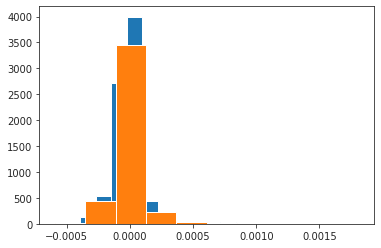

(array([6.000e+00, 8.420e+02, 1.951e+04, 9.480e+02, 1.540e+02, 5.800e+01,
        1.100e+01, 1.300e+01, 5.000e+00, 4.000e+00]),
 array([-3.56411314e-04, -2.05845163e-04, -5.52790120e-05,  9.52871391e-05,
         2.45853290e-04,  3.96419441e-04,  5.46985592e-04,  6.97551744e-04,
         8.48117895e-04,  9.98684046e-04,  1.14925020e-03]),
 <BarContainer object of 10 artists>)

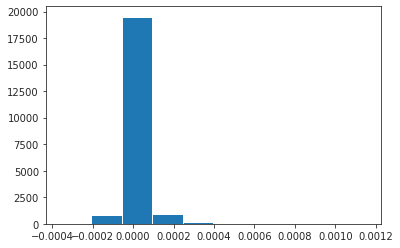

In [16]:
lineagedata = combinenaivedata[combinenaivedata.obs.lineagetopics!='ZZ Non malignant']

computing PCA
    with n_comps=50
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
    finished (0:00:17)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.0000001  1.         0.998906   0.9987212  0.9983588  0.9960006
     0.99584186 0.9951335  0.99465525 0.99376905 0.99268675 0.9921339
     0.99129355 0.99126446 0.99087137]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
... storing 'pid' as categorical
... storing 'Level 2 Annotation' as categorical
... st

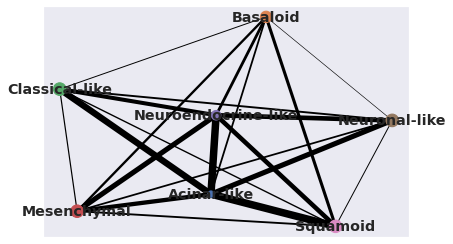

In [83]:
obs_ofinterest = []
for col in df.columns:
    obs_ofinterest = obs_ofinterest + list(lineagedata.obs[df.columns].sort_values(by=col, ascending=False).index[0:1000])
lineagedata = lineagedata[obs_ofinterest]
sc.tl.pca(lineagedata)
sc.pp.neighbors(lineagedata)
sc.tl.diffmap(lineagedata, n_comps=15)
sc.tl.paga(lineagedata, groups='lineagetopics')
sc.pl.paga(lineagedata, color=['lineagetopics'])

In [19]:
lineage_df = df.copy()

In [20]:
correlations = []
for col1 in state_df.columns:
    correlation = []
    for col2 in lineage_df.columns:
        correlation.append(np.corrcoef(state_df[col1], lineage_df[col2])[0][1])
    correlations.append(correlation)

In [21]:
correlations = pd.DataFrame(correlations, index=state_df.columns, columns=lineage_df.columns)

In [22]:
correlations

Neuroendocrine-like  Mesenchymal  Classical-like  \
Cycling (S)                      0.073309    -0.007849       -0.009743   
Ribosomal                        0.002133     0.087931       -0.006675   
malignant_Adhesive               0.004233    -0.030073        0.086482   
Interferon signaling             0.003341    -0.007182        0.075733   
Cycling (G2/M)                   0.028918    -0.004168        0.002821   
TNF-NFkB signaling               0.010959     0.009945       -0.034985   
MYC signaling                    0.041160    -0.025488        0.189450   

                      Acinar-like  Neuronal-like  Basaloid  Squamoid  
Cycling (S)              0.002270       0.025815  0.004683  0.005582  
Ribosomal                0.005472      -0.008660  0.282636  0.037046  
malignant_Adhesive      -0.003016       0.155552 -0.010098  0.004368  
Interferon signaling    -0.001447       0.015832  0.027462  0.057130  
Cycling (G2/M)          -0.000803       0.001261  0.005274 -0.001492  
TNF-NFkB signaling      -0.002080       0.051999  0.046376  0.043745  
MYC signaling            0.000885       0.055428  0.007343  0.003904

NameError: name 'd' is not defined

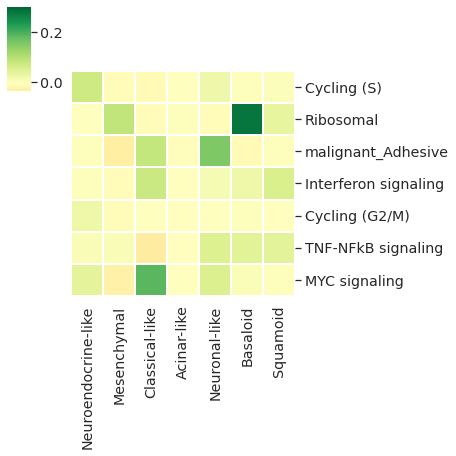

In [25]:
sns.set(font_scale=1.3)
sns_plot = sns.clustermap(correlations,cmap="RdYlGn", linewidths = 1, linecolor='white', row_cluster = False, col_cluster = False, vmax = 0.3, figsize=(6.5, 6.5), center = 0)
d.ax_row_dendrogram.set_visible(False)
d.ax_col_dendrogram.set_visible(False)
d.savefig("malignant_program_correlations.pdf")

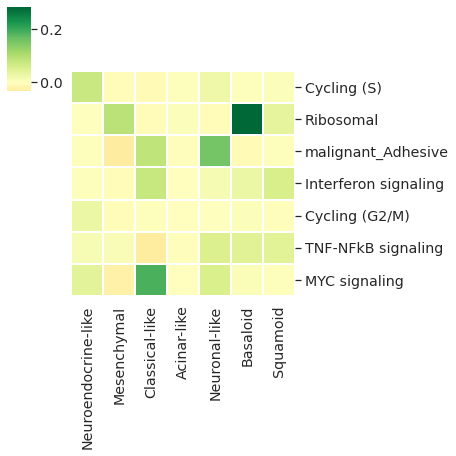

In [26]:
sns_plot = sns.clustermap(correlations,cmap="RdYlGn", linewidths = 1, linecolor='white', row_cluster = False, col_cluster = False, figsize=(6.5, 6.5), center = 0)


# fibroblast

In [41]:
fibro_topic_map = {0:'Immunomodulatory',
1:'Neurotropic',
2:'Fibro_Adhesive',
3:'Myofibroblastic'}

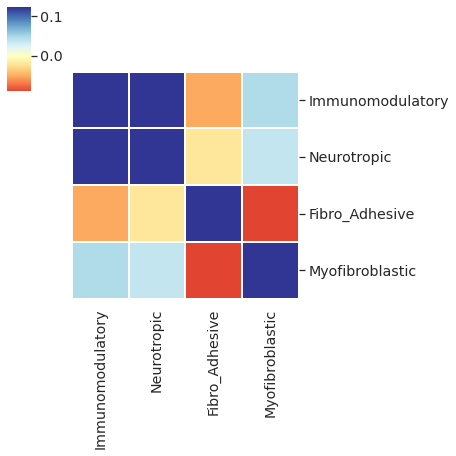

In [45]:
df = pd.DataFrame(fibro.obsm['usage_nmf4'])
fibro_topics = [0,1,2,3]
df = df[fibro_topics]
df.columns = [fibro_topic_map.get(col, col) for col in df.columns]
sns_plot = sns.clustermap(df.corr(),cmap="RdYlBu", linewidths = 1, linecolor='white', row_cluster = False, col_cluster = False, figsize=(6.5, 6.5), vmin= -0.0905, vmax = 0.1237, center = 0)
sns_plot.ax_row_dendrogram.set_visible(False)
sns_plot.ax_col_dendrogram.set_visible(False)
sns_plot.savefig("fibroblast_program_correlations.pdf")

In [43]:
df.corr()

Immunomodulatory  Neurotropic  Fibro_Adhesive  \
Immunomodulatory          1.000000     0.123663       -0.050536   
Neurotropic               0.123663     1.000000       -0.019111   
Fibro_Adhesive           -0.050536    -0.019111        1.000000   
Myofibroblastic           0.046672     0.038293       -0.090410   

                  Myofibroblastic  
Immunomodulatory         0.046672  
Neurotropic              0.038293  
Fibro_Adhesive          -0.090410  
Myofibroblastic          1.000000

done


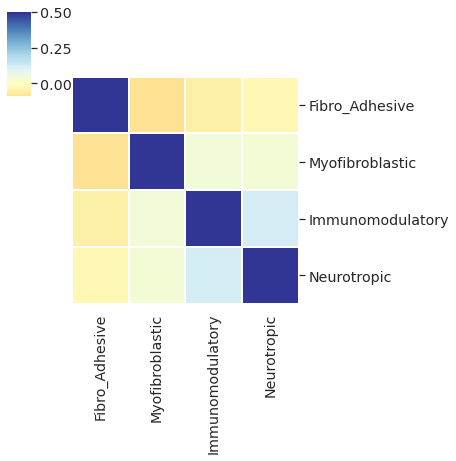

In [23]:
for col in df.columns:
    fibro.obs[col] = list(df[col])
    combinenaivedata.obs[col] = fibro.obs[col]

fibro.obs['fibrotopics'] = [i for i in df.idxmax(axis=1)]
fibro.obs['fibrotopics'] = fibro.obs['fibrotopics'].astype('category')
#sc.pl.umap(fibro, color='fibrotopics')
combinenaivedata.obs['fibrotopics'] = fibro.obs['fibrotopics']
combinenaivedata.obs['fibrotopics'] = [t if ct=='Cancer-associated fibroblast' else 'ZZ Non fibroblast' for t, ct in zip(combinenaivedata.obs['fibrotopics'], combinenaivedata.obs['Level 1 Annotation'])]  
scp.composition_plot(combinenaivedata, 'new_treatment', 'fibrotopics', height=450)
print("done")

In [24]:
genedf = pd.DataFrame(fibro.varm['genescores_nmf4']).fillna(0)
genedf.index = fibro.var_names
genedf.columns = [fibro_topic_map.get(col, col) for col in genedf.columns]
22164 - np.argsort(genedf, axis=0)[[True if gene in ['IL6', 'CXCL2', 'CXCL12', 'CCL2'] else False for gene in genedf.index]]

Immunomodulatory  Neurotropic  Fibro_Adhesive  Myofibroblastic
CXCL2              15714        19190           20464             2943
IL6                  757         3675            1753             8852
CXCL12             21100        21351             855            16023
CCL2               13900         4789            2171            21800

# boxplots

In [25]:
p2t = dict((p, t) for p, t in zip(combinenaivedata.obs.pid, combinenaivedata.obs.new_treatment))

In [26]:
def topic_dirichlet(df, topic_col, val_col):
    df = df.pivot(index='pid', columns=topic_col, values=val_col)
    df.columns = list(df.columns)
    df = df.reset_index()

    data_all = dat.from_pandas(df, covariate_columns=["pid"])
    data_all.obs['treatment'] = [p2t.get(p) for p in data_all.obs.pid]
    data_all.obs.treatment
    data_all = data_all[data_all.obs["treatment"].isin(["Untreated", "CRT"])]

    viz.boxplots(data_all, feature_name="treatment")
    model_salm = mod.CompositionalAnalysis(data_all, formula="treatment", reference_cell_type='automatic')
    sim_results = model_salm.sample_hmc()
    print(sim_results.summary_extended(hdi_prob=0.9))
    print(sim_results.credible_effects())

In [27]:
def dirichlet_multinomial(adata, celllabel, comp, ref):
    p2t = dict((p, t) for p, t in zip(adata.obs.pid, adata.obs.new_treatment))
    df = adata.obs.groupby(['pid', celllabel]).agg({'new_treatment':'first', 'total_counts':'count'}).reset_index()
    total = adata.obs.groupby(['pid', 'new_treatment']).agg({'total_counts':'count'}).to_dict()['total_counts']
    df['overall'] = [total.get((pid, treatment), 0) for pid, treatment in zip(df['pid'], df['new_treatment'])]
    df['new_treatment']= [p2t.get(p) for p in df['pid']]
    df = df[~df.overall.isna()]
    df['normalized'] = df['total_counts']/df['overall']
    df.columns = ['pid','cell_type','treatment','total_counts','overall','normalized']
    df = df.pivot(index='pid', columns='cell_type', values='total_counts')
    df.columns = list(df.columns)
    df = df.reset_index()

    data_all = dat.from_pandas(df, covariate_columns=["pid"])
    data_all.obs['treatment'] = [p2t.get(p) for p in data_all.obs.pid]
    data_all.obs.treatment
    data_all = data_all[data_all.obs["treatment"].isin(["Untreated", comp])]

    viz.boxplots(data_all, feature_name="treatment")
    model_salm = mod.CompositionalAnalysis(data_all, formula="treatment", reference_cell_type=ref)
    sim_results = model_salm.sample_hmc()
    display(sim_results.summary_extended(hdi_prob=0.9))
    display(sim_results.credible_effects())

In [28]:
from scipy.stats import mannwhitneyu

dict_values(['Neuroendocrine-like', 'Mesenchymal', 'Classical-like', 'Acinar-like', 'Neuronal-like', 'Basaloid', 'Squamoid'])


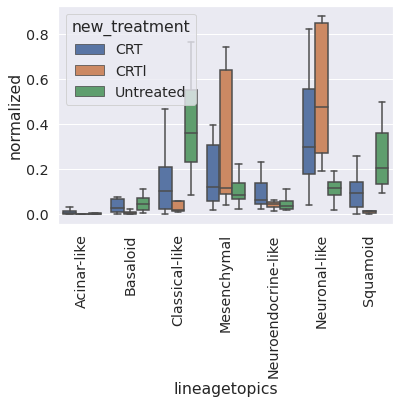

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Squamoid	15	0.035510
CRTl	Untreated	Squamoid	0	0.000455
CRT	CRTl	Squamoid	15	0.035510
CRT	Untreated	Squamoid	45	0.001114
Untreated	CRTl	Squamoid	0	0.000455
Untreated	CRT	Squamoid	45	0.001114
CRTl	CRT	Basaloid	16	0.043309
CRTl	Untreated	Basaloid	10	0.005063
CRT	CRTl	Basaloid	16	0.043309
CRT	Untreated	Basaloid	106	0.229404
Untreated	CRTl	Basaloid	10	0.005063
Untreated	CRT	Basaloid	106	0.229404
CRTl	CRT	Neuronal-like	21	0.105676
CRTl	Untreated	Neuronal-like	2	0.000768
CRT	CRTl	Neuronal-like	21	0.105676
CRT	Untreated	Neuronal-like	51	0.002327
Untreated	CRTl	Neuronal-like	2	0.000768
Untreated	CRT	Neuronal-like	51	0.002327
CRTl	CRT	Acinar-like	15	0.035510
CRTl	Untreated	Acinar-like	19	0.028673
CRT	CRTl	Acinar-like	15	0.035510
CRT	Untreated	Acinar-like	98	0.148095
Untreated	CRTl	Acinar-like	19	0.028673
Untreated	CRT	Acinar-like	98	0.148095
CRTl	CRT	Neuroendocrine-like	17	0.052596
CRTl	Untreated	Neuroendocrine-like	45	0.485136
CRT	CRTl	Neuroendocrine-like	17	0.052596
CRT	Untreated	Neu

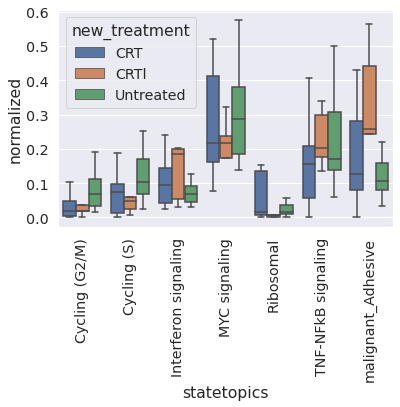

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Interferon signaling	26	0.215656
CRTl	Untreated	Interferon signaling	31	0.157152
CRT	CRTl	Interferon signaling	26	0.215656
CRT	Untreated	Interferon signaling	106	0.229424
Untreated	CRTl	Interferon signaling	31	0.157152
Untreated	CRT	Interferon signaling	106	0.229424
CRTl	CRT	Cycling (G2/M)	30	0.338412
CRTl	Untreated	Cycling (G2/M)	17	0.020195
CRT	CRTl	Cycling (G2/M)	30	0.338412
CRT	Untreated	Cycling (G2/M)	53	0.002941
Untreated	CRTl	Cycling (G2/M)	17	0.020195
Untreated	CRT	Cycling (G2/M)	53	0.002941
CRTl	CRT	Ribosomal	21	0.105676
CRTl	Untreated	Ribosomal	20	0.033916
CRT	CRTl	Ribosomal	21	0.105676
CRT	Untreated	Ribosomal	122	0.447115
Untreated	CRTl	Ribosomal	20	0.033916
Untreated	CRT	Ribosomal	122	0.447115
CRTl	CRT	Cycling (S)	31	0.372955
CRTl	Untreated	Cycling (S)	17	0.020195
CRT	CRTl	Cycling (S)	31	0.372955
CRT	Untreated	Cycling (S)	77	0.032711
Untreated	CRTl	Cycling (S)	17	0.020195
Untreated	CRT	Cycling (S)	77	0.032711
CRTl	CRT	malignant_Adhesive	17	0.052596
CRTl	Untreated	m

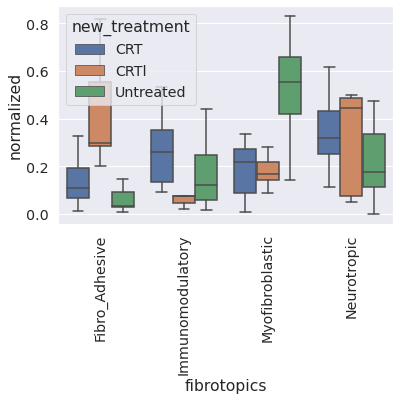

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Neurotropic	34	0.481539
CRTl	Untreated	Neurotropic	34	0.216924
CRT	CRTl	Neurotropic	34	0.481539
CRT	Untreated	Neurotropic	76	0.030030
Untreated	CRTl	Neurotropic	34	0.216924
Untreated	CRT	Neurotropic	76	0.030030
CRTl	CRT	Fibro_Adhesive	10	0.011657
CRTl	Untreated	Fibro_Adhesive	3	0.000990
CRT	CRTl	Fibro_Adhesive	10	0.011657
CRT	Untreated	Fibro_Adhesive	60	0.006421
Untreated	CRTl	Fibro_Adhesive	3	0.000990
Untreated	CRT	Fibro_Adhesive	60	0.006421
CRTl	CRT	Immunomodulatory	5	0.003156
CRTl	Untreated	Immunomodulatory	28	0.109379
CRT	CRTl	Immunomodulatory	5	0.003156
CRT	Untreated	Immunomodulatory	70	0.017504
Untreated	CRTl	Immunomodulatory	28	0.109379
Untreated	CRT	Immunomodulatory	70	0.017504
CRTl	CRT	Myofibroblastic	32	0.408481
CRTl	Untreated	Myofibroblastic	5	0.001619
CRT	CRTl	Myofibroblastic	32	0.408481
CRT	Untreated	Myofibroblastic	39	0.000508
Untreated	CRTl	Myofibroblastic	5	0.001619
Untreated	CRT	Myofibroblastic	39	0.000508


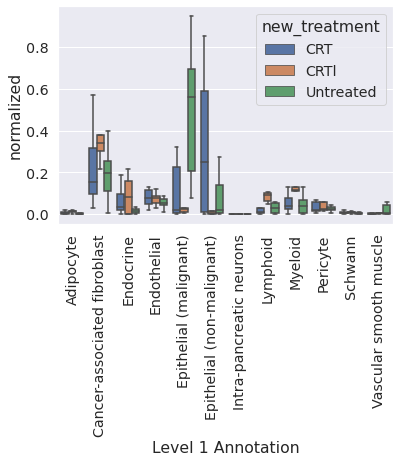

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Endothelial	33	0.444775
CRTl	Untreated	Endothelial	32	0.175747
CRT	CRTl	Endothelial	33	0.444775
CRT	Untreated	Endothelial	93	0.108495
Untreated	CRTl	Endothelial	32	0.175747
Untreated	CRT	Endothelial	93	0.108495
CRTl	CRT	Intra-pancreatic neurons	28	0.236806
CRTl	Untreated	Intra-pancreatic neurons	33	0.128056
CRT	CRTl	Intra-pancreatic neurons	28	0.236806
CRT	Untreated	Intra-pancreatic neurons	119	0.368949
Untreated	CRTl	Intra-pancreatic neurons	33	0.128056
Untreated	CRT	Intra-pancreatic neurons	119	0.368949
CRTl	CRT	Adipocyte	32	0.404977
CRTl	Untreated	Adipocyte	25	0.043729
CRT	CRTl	Adipocyte	32	0.404977
CRT	Untreated	Adipocyte	79	0.023516
Untreated	CRTl	Adipocyte	25	0.043729
Untreated	CRT	Adipocyte	79	0.023516
CRTl	CRT	Schwann	34	0.481539
CRTl	Untreated	Schwann	27	0.096053
CRT	CRTl	Schwann	34	0.481539
CRT	Untreated	Schwann	64	0.009741
Untreated	CRTl	Schwann	27	0.096053
Untreated	CRT	Schwann	64	0.009741
CRTl	CRT	Cancer-associated fibroblast	15	0.035510
CRTl	Untreated	Cancer-asso

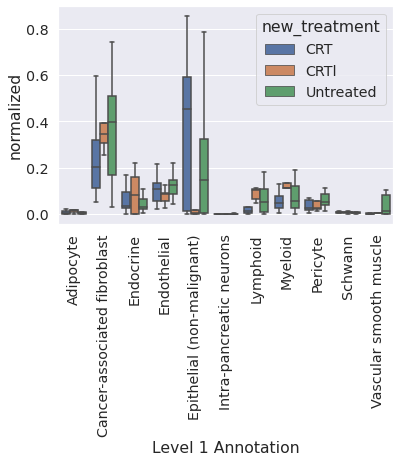

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Endothelial	26	0.215656
CRTl	Untreated	Endothelial	20	0.033916
CRT	CRTl	Endothelial	26	0.215656
CRT	Untreated	Endothelial	99	0.157051
Untreated	CRTl	Endothelial	20	0.033916
Untreated	CRT	Endothelial	99	0.157051
CRTl	CRT	Intra-pancreatic neurons	28	0.236806
CRTl	Untreated	Intra-pancreatic neurons	35	0.176406
CRT	CRTl	Intra-pancreatic neurons	28	0.236806
CRT	Untreated	Intra-pancreatic neurons	122	0.433559
Untreated	CRTl	Intra-pancreatic neurons	35	0.176406
Untreated	CRT	Intra-pancreatic neurons	122	0.433559
CRTl	CRT	Adipocyte	32	0.404977
CRTl	Untreated	Adipocyte	26	0.052474
CRT	CRTl	Adipocyte	32	0.404977
CRT	Untreated	Adipocyte	84	0.038159
Untreated	CRTl	Adipocyte	26	0.052474
Untreated	CRT	Adipocyte	84	0.038159
CRTl	CRT	Schwann	29	0.305306
CRTl	Untreated	Schwann	45	0.485136
CRT	CRTl	Schwann	29	0.305306
CRT	Untreated	Schwann	110	0.277999
Untreated	CRTl	Schwann	45	0.485136
Untreated	CRT	Schwann	110	0.277999
CRTl	CRT	Cancer-associated fibroblast	15	0.035510
CRTl	Untreated	Cancer-as

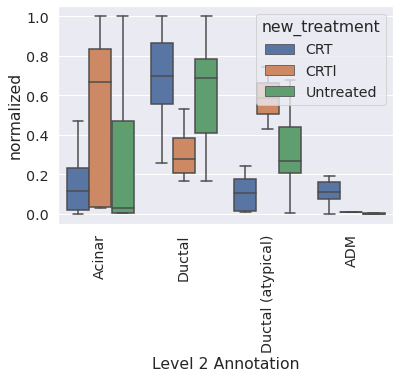

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Ductal	4	0.010561
CRTl	Untreated	Ductal	9	0.027902
CRT	CRTl	Ductal	4	0.010561
CRT	Untreated	Ductal	73	0.303475
Untreated	CRTl	Ductal	9	0.027902
Untreated	CRT	Ductal	73	0.303475
CRTl	CRT	Ductal (atypical)	2	0.046695
CRTl	Untreated	Ductal (atypical)	6	0.116861
CRT	CRTl	Ductal (atypical)	2	0.046695
CRT	Untreated	Ductal (atypical)	38	0.018730
Untreated	CRTl	Ductal (atypical)	6	0.116861
Untreated	CRT	Ductal (atypical)	38	0.018730
CRTl	CRT	Acinar	16	0.106351
CRTl	Untreated	Acinar	10	0.093538
CRT	CRTl	Acinar	16	0.106351
CRT	Untreated	Acinar	41	0.418227
Untreated	CRTl	Acinar	10	0.093538
Untreated	CRT	Acinar	41	0.418227
CRTl	CRT	ADM	1	0.191367
CRTl	Untreated	ADM	1	0.279092
CRT	CRTl	ADM	1	0.191367
CRT	Untreated	ADM	10	0.127812
Untreated	CRTl	ADM	1	0.279092
Untreated	CRT	ADM	10	0.127812


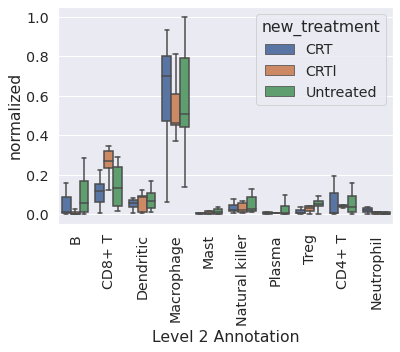

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Macrophage	25	0.189557
CRTl	Untreated	Macrophage	41	0.397070
CRT	CRTl	Macrophage	25	0.189557
CRT	Untreated	Macrophage	111	0.290865
Untreated	CRTl	Macrophage	41	0.397070
Untreated	CRT	Macrophage	111	0.290865
CRTl	CRT	Natural killer	30	0.421857
CRTl	Untreated	Natural killer	20	0.290771
CRT	CRTl	Natural killer	30	0.421857
CRT	Untreated	Natural killer	56	0.309855
Untreated	CRTl	Natural killer	20	0.290771
Untreated	CRT	Natural killer	56	0.309855
CRTl	CRT	Mast	15	0.349838
CRTl	Untreated	Mast	16	0.408481
CRT	CRTl	Mast	15	0.349838
CRT	Untreated	Mast	28	0.144657
Untreated	CRTl	Mast	16	0.408481
Untreated	CRT	Mast	28	0.144657
CRTl	CRT	Plasma	9	0.457229
CRTl	Untreated	Plasma	11	0.460691
CRT	CRTl	Plasma	9	0.457229
CRT	Untreated	Plasma	44	0.229836
Untreated	CRTl	Plasma	11	0.460691
Untreated	CRT	Plasma	44	0.229836
CRTl	CRT	Neutrophil	3	0.116519
CRTl	Untreated	Neutrophil	9	0.451262
CRT	CRTl	Neutrophil	3	0.116519
CRT	Untreated	Neutrophil	3	0.188380
Untreated	CRTl	Neutrophil	9	0.451262
Untreate

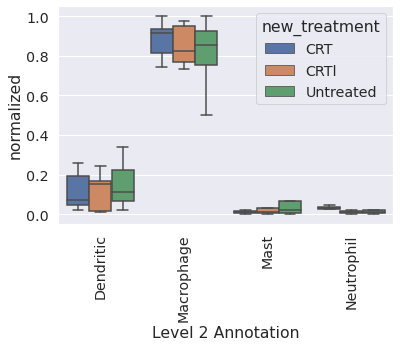

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Macrophage	33	0.444775
CRTl	Untreated	Macrophage	41	0.397095
CRT	CRTl	Macrophage	33	0.444775
CRT	Untreated	Macrophage	102	0.191120
Untreated	CRTl	Macrophage	41	0.397095
Untreated	CRT	Macrophage	102	0.191120
CRTl	CRT	Mast	17	0.469251
CRTl	Untreated	Mast	15	0.349838
CRT	CRTl	Mast	17	0.469251
CRT	Untreated	Mast	26	0.108187
Untreated	CRTl	Mast	15	0.349838
Untreated	CRT	Mast	26	0.108187
CRTl	CRT	Neutrophil	0	0.018444
CRTl	Untreated	Neutrophil	9	0.451262
CRT	CRTl	Neutrophil	0	0.018444
CRT	Untreated	Neutrophil	2	0.107962
Untreated	CRTl	Neutrophil	9	0.451262
Untreated	CRT	Neutrophil	2	0.107962
CRTl	CRT	Dendritic	28	0.346683
CRTl	Untreated	Dendritic	36	0.319150
CRT	CRTl	Dendritic	28	0.346683
CRT	Untreated	Dendritic	92	0.225625
Untreated	CRTl	Dendritic	36	0.319150
Untreated	CRT	Dendritic	92	0.225625


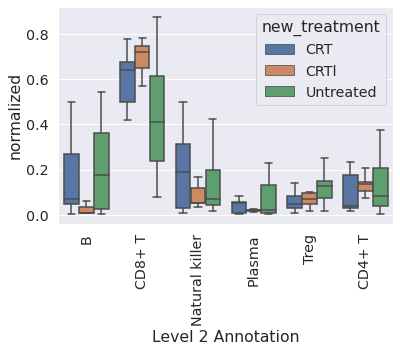

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Natural killer	23	0.187498
CRTl	Untreated	Natural killer	24	0.475585
CRT	CRTl	Natural killer	23	0.187498
CRT	Untreated	Natural killer	54	0.257464
Untreated	CRTl	Natural killer	24	0.475585
Untreated	CRT	Natural killer	54	0.257464
CRTl	CRT	Plasma	8	0.373417
CRTl	Untreated	Plasma	9	0.383585
CRT	CRTl	Plasma	8	0.373417
CRT	Untreated	Plasma	50	0.375628
Untreated	CRTl	Plasma	9	0.383585
Untreated	CRT	Plasma	50	0.375628
CRTl	CRT	B	6	0.130786
CRTl	Untreated	B	7	0.053219
CRT	CRTl	B	6	0.130786
CRT	Untreated	B	48	0.413975
Untreated	CRTl	B	7	0.053219
Untreated	CRT	B	48	0.413975
CRTl	CRT	CD8+ T	19	0.099902
CRTl	Untreated	CD8+ T	13	0.018090
CRT	CRTl	CD8+ T	19	0.099902
CRT	Untreated	CD8+ T	63	0.058623
Untreated	CRTl	CD8+ T	13	0.018090
Untreated	CRT	CD8+ T	63	0.058623
CRTl	CRT	CD4+ T	12	0.208396
CRTl	Untreated	CD4+ T	23	0.325219
CRT	CRTl	CD4+ T	12	0.208396
CRT	Untreated	CD4+ T	31	0.263051
Untreated	CRTl	CD4+ T	23	0.325219
Untreated	CRT	CD4+ T	31	0.263051
CRTl	CRT	Treg	21	0.334085
CRTl	Untreated

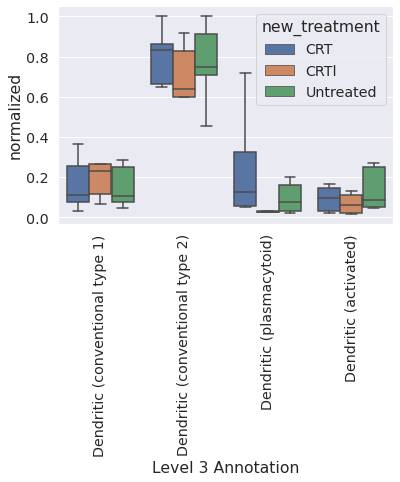

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


CRTl	CRT	Dendritic (conventional type 2)	18	0.112574
CRTl	Untreated	Dendritic (conventional type 2)	28	0.170849
CRT	CRTl	Dendritic (conventional type 2)	18	0.112574
CRT	Untreated	Dendritic (conventional type 2)	94	0.481458
Untreated	CRTl	Dendritic (conventional type 2)	28	0.170849
Untreated	CRT	Dendritic (conventional type 2)	94	0.481458
CRTl	CRT	Dendritic (activated)	8	0.101365
CRTl	Untreated	Dendritic (activated)	10	0.123580
CRT	CRTl	Dendritic (activated)	8	0.101365
CRT	Untreated	Dendritic (activated)	27	0.220569
Untreated	CRTl	Dendritic (activated)	10	0.123580
Untreated	CRT	Dendritic (activated)	27	0.220569
CRTl	CRT	Dendritic (conventional type 1)	18	0.212992
CRTl	Untreated	Dendritic (conventional type 1)	21	0.184985
CRT	CRTl	Dendritic (conventional type 1)	18	0.212992
CRT	Untreated	Dendritic (conventional type 1)	58	0.460595
Untreated	CRTl	Dendritic (conventional type 1)	21	0.184985
Untreated	CRT	Dendritic (conventional type 1)	58	0.460595
CRTl	CRT	Dendritic (plasmacytoid)	0	0.0525

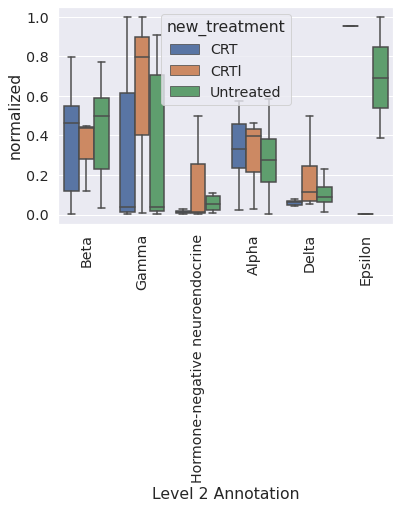

CRTl	CRT	Hormone-negative neuroendocrine	11	0.459354
CRTl	Untreated	Hormone-negative neuroendocrine	7	0.349268
CRT	CRTl	Hormone-negative neuroendocrine	11	0.459354
CRT	Untreated	Hormone-negative neuroendocrine	11	0.053292
Untreated	CRTl	Hormone-negative neuroendocrine	7	0.349268
Untreated	CRT	Hormone-negative neuroendocrine	11	0.053292
CRTl	CRT	Alpha	13	0.500000
CRTl	Untreated	Alpha	15	0.359108
CRT	CRTl	Alpha	13	0.500000
CRT	Untreated	Alpha	48	0.347947
Untreated	CRTl	Alpha	15	0.359108
Untreated	CRT	Alpha	48	0.347947
CRTl	CRT	Epsilon	0	0.500000
CRTl	Untreated	Epsilon	0	0.270146
CRT	CRTl	Epsilon	0	0.500000
CRT	Untreated	Epsilon	1	0.270146
Untreated	CRTl	Epsilon	0	0.270146
Untreated	CRT	Epsilon	1	0.270146
CRTl	CRT	Gamma	11	0.277057
CRTl	Untreated	Gamma	12	0.336302
CRT	CRTl	Gamma	11	0.277057
CRT	Untreated	Gamma	44	0.338792
Untreated	CRTl	Gamma	12	0.336302
Untreated	CRT	Gamma	44	0.338792
CRTl	CRT	Beta	13	0.258001
CRTl	Untreated	Beta	16	0.238598
CRT	CRTl	Beta	13	0.258001
CRT	Untreated	Beta	8

<ipython-input-29-1e8ffb2d8c27>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-29-1e8ffb2d8c27>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


<Figure size 432x288 with 0 Axes>

In [29]:
#annots = ['Dendritic', 'Myeloid', 'Lymphoid', 'Endocrine', 'Epithelial (non-malignant)', 'Level 1 Annotation', 'lineagetopics', 'statetopics', 'statetopics_collapsed', 'fibrotopics']
#annots = ['Level 1 Annotation', 'Endocrine', 'NoMalignant', 'Epithelial (non-malignant)', 'Immune', 'Myeloid', 'Lymphoid', 'Dendritic']
annots = ['lineagetopics', 'statetopics', 'fibrotopics', 'Level 1 Annotation', 'NoMalignant', 'Epithelial (non-malignant)', 'Immune', 'Myeloid', 'Lymphoid', 'Dendritic', 'Endocrine',]
#annots = ['Level 1 Annotation']
#plt.subplots(figsize = (20,7))
total_topic_output = []
for a in annots:
    outkey = a
    if a in ['Myeloid', 'Lymphoid', 'Endocrine', 'Epithelial (non-malignant)']:
        subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']==a].copy()
        a = 'Level 2 Annotation'
    elif a in ['Dendritic']:
        subset = combinenaivedata[combinenaivedata.obs['Level 2 Annotation']==a].copy()
        a = 'Level 3 Annotation'
    elif a in ['NoMalignant']:
        subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='Epithelial (malignant)'].copy()
        a = 'Level 1 Annotation'
    elif a == 'Immune':
        subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation']=='Myeloid')|(combinenaivedata.obs['Level 1 Annotation']=='Lymphoid')].copy()
        a = 'Level 2 Annotation'
    else:
        subset = combinenaivedata
    
    if a in ['lineagetopics', 'statetopics', 'statetopics_collapsed', 'fibrotopics']:
        if a in ['fibrotopics']:
            mapping = fibro_topic_map
        elif a in ['lineagetopics']:
            mapping = malignant_lineagetopic_map
        elif a in ['statetopics']:
            mapping = malignant_statetopic_map
        elif a in ['statetopics_collapsed']:
            mapping = malignant_condensed_statetopic_map
            
        df = subset.obs[['pid', 'new_treatment', 'total_counts', a] + list(mapping.values())]
        print(mapping.values())
        #df = df[~df[a].str.startswith('ZZ')]
        df.pop(a)

        # un pivot
        df.pop('total_counts')
        df = df.melt(id_vars=['pid','new_treatment'], var_name=a, value_name='total_counts')
        total = df.groupby(['pid', 'new_treatment']).agg({'total_counts':'sum'}).to_dict()['total_counts']
        
        df = df[df.new_treatment!='Other']
        df = df.groupby(['pid', 'new_treatment', a]).agg('sum').reset_index()
        df['overall'] = [total.get((pid, treatment)) for pid, treatment in zip(df['pid'], df['new_treatment'])]
        df = df[~df.overall.isna()]
        df['normalized'] = df['total_counts']/df['overall']
        #df['normalized'] = df.normalized.fillna(0)
        sns.boxplot(data=df, x=a, y='normalized', hue='new_treatment', showfliers=False)
        plt.xticks(rotation=90)
        plt.show()
        plt.clf()
        #topic_dirichlet(df, a, 'normalized')
    else:
        df = subset.obs[['pid', 'new_treatment', 'total_counts'] + [a]]
        total = df.groupby(['pid', 'new_treatment']).agg({'total_counts':'count'}).to_dict()['total_counts']
        df = df[df.new_treatment!='Other']
        df = df.groupby(['pid', 'new_treatment', a]).agg('count').reset_index()
        df['overall'] = [total.get((pid, treatment)) for pid, treatment in zip(df['pid'], df['new_treatment'])]
        df = df[~df.overall.isna()]
        df['normalized'] = df['total_counts']/df['overall']
        #df['normalized'] = df.normalized.fillna(0)
        sns.boxplot(data=df, x=a, y='normalized', hue='new_treatment', showfliers=False)
        plt.xticks(rotation=90)
        plt.show()
        plt.clf()
        df['total_counts'] = df['total_counts'].fillna(0)
        df['normalized'] = df['normalized'].fillna(0)

    tmp = df.copy()
    tmp.columns = ['pid', 'new_treatment', 'topics', 'total_counts', 'overall', 'normalized']
    total_topic_output.append(tmp)
    df.to_csv('/ahg/regevdata/projects/Pancreas/src/results/%s.csv'%outkey)
        
    for topic in set(df[a]):
        for treatmentstatus1 in set(df.new_treatment):
            for treatmentstatus2 in set(df.new_treatment):
                if treatmentstatus1!=treatmentstatus2:
                    data1 = df[(df.new_treatment==treatmentstatus1)&(df[a]==topic)]
                    data2 = df[(df.new_treatment==treatmentstatus2)&(df[a]==topic)]
                    data1['normalized'] = data1['normalized'].fillna(0)
                    data2['normalized'] = data2['normalized'].fillna(0)
                    if np.sum(data1['normalized'].values)==0 and np.sum(data2['normalized'].values)==0:
                        continue
                    else:
                        U1, p = mannwhitneyu(data1['normalized'].values, data2['normalized'].values)
                    #if p < .05:
                    print("%s\t%s\t%s\t%d\t%5f"%(treatmentstatus1, treatmentstatus2, topic, U1, p))

Level 1 Annotation


/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Automatic reference selection! Reference cell type set to Schwann
Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (95.683 sec)
Acceptance rate: 47.4%
Compositional Analysis summary (extended):

Data: 32 samples, 12 cell types
Reference index: 10
Formula: treatment
Spike-and-slab threshold: 0.625

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 95.683 sec. Acceptance rate: 47.4%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.842  -2.206   -1.501  0.214   
Cancer-associated fibroblast            0.266  -0.024    0.561  0.181   
Endocrine                              -0.967  -1.280   -0.646  0.196   
Endothelial                            -0.229  -0.489    0.075  0.177   
Epithelial (malignant)                 -0.730  -1.146   -0.348  0.247   
Epithelial (non-malignant)             

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None

Covariate               Cell Type                   
treatment[T.Untreated]  Adipocyte                       False
                        Cancer-associated fibroblast    False
                        Endocrine                       False
                        Endothelial                     False
                        Epithelial (malignant)           True
                        Epithelial (non-malignant)      False
                        Intra-pancreatic neurons        False
                        Lymphoid                        False
                        Myeloid                         False
                        Pericyte                        False
                        Schwann                         False
                        Vascular smooth muscle          False
Name: Inclusion probability, dtype: bool

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Automatic reference selection! Reference cell type set to Endothelial
Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (88.281 sec)
Acceptance rate: 50.3%
Compositional Analysis summary (extended):

Data: 23 samples, 12 cell types
Reference index: 3
Formula: treatment
Spike-and-slab threshold: 0.625

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 88.281 sec. Acceptance rate: 50.3%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.617  -2.237   -1.115  0.380   
Cancer-associated fibroblast            1.280   0.579    1.806  0.363   
Endocrine                              -0.860  -1.336   -0.372  0.296   
Endothelial                            -0.094  -0.370    0.200  0.169   
Epithelial (malignant)                 -0.404  -0.930    0.228  0.387   
Epithelial (non-malignant)          

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None

Covariate               Cell Type                   
treatment[T.Untreated]  Adipocyte                       False
                        Cancer-associated fibroblast     True
                        Endocrine                       False
                        Endothelial                     False
                        Epithelial (malignant)           True
                        Epithelial (non-malignant)      False
                        Intra-pancreatic neurons        False
                        Lymphoid                         True
                        Myeloid                          True
                        Pericyte                        False
                        Schwann                         False
                        Vascular smooth muscle          False
Name: Inclusion probability, dtype: bool

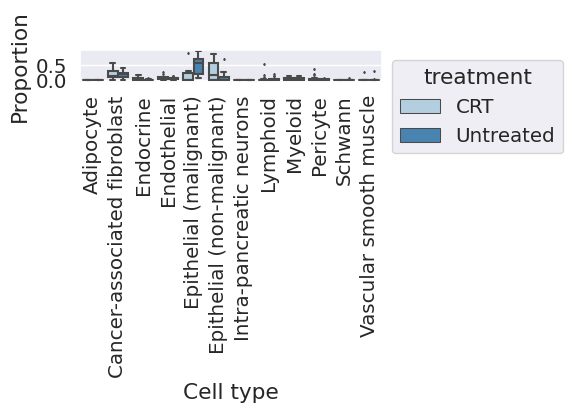

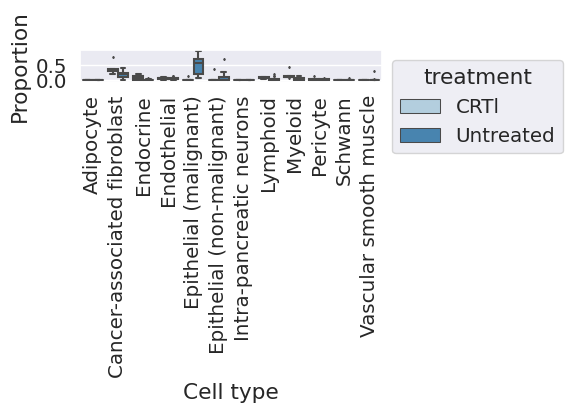

In [66]:
#annots = ['Dendritic', 'Myeloid', 'Lymphoid', 'Endocrine', 'Epithelial (non-malignant)', 'Level 1 Annotation', 'lineagetopics', 'statetopics', 'statetopics_collapsed', 'fibrotopics']
#annots = ['lineagetopics', 'statetopics', 'fibrotopics', 'Level 1 Annotation', 'Endocrine', 'NoMalignant', 'Epithelial (non-malignant)', 'Immune', 'Myeloid', 'Lymphoid', 'Dendritic']
annots = ['Level 1 Annotation']
#annots = ['Level 1 Annotation']
#plt.subplots(figsize = (20,7))
total_topic_output = []
for a in annots:
    outkey = a
    if a in ['Myeloid', 'Lymphoid', 'Endocrine', 'Epithelial (non-malignant)']:
        subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']==a].copy()
        a = 'Level 2 Annotation'
    elif a in ['Dendritic']:
        subset = combinenaivedata[combinenaivedata.obs['Level 2 Annotation']==a].copy()
        a = 'Level 3 Annotation'
    elif a in ['NoMalignant']:
        subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='Epithelial (malignant)'].copy()
        a = 'Level 1 Annotation'
    elif a == 'Immune':
        subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation']=='Myeloid')|(combinenaivedata.obs['Level 1 Annotation']=='Lymphoid')].copy()
        a = 'Level 2 Annotation'
    else:
        subset = combinenaivedata
    
    if a in ['lineagetopics', 'statetopics', 'statetopics_collapsed', 'fibrotopics']:
        if a in ['fibrotopics']:
            mapping = fibro_topic_map
        elif a in ['lineagetopics']:
            mapping = malignant_lineagetopic_map
        elif a in ['statetopics']:
            mapping = malignant_statetopic_map
        elif a in ['statetopics_collapsed']:
            mapping = malignant_condensed_statetopic_map
            
        df = subset.obs[['pid', 'new_treatment', 'total_counts', a] + list(mapping.values())]
        print(mapping.values())
        #df = df[~df[a].str.startswith('ZZ')]
        df.pop(a)

        # un pivot
        df.pop('total_counts')
        df = df.melt(id_vars=['pid','new_treatment'], var_name=a, value_name='total_counts')
        total = df.groupby(['pid', 'new_treatment']).agg({'total_counts':'sum'}).to_dict()['total_counts']
        
        df = df[df.new_treatment!='Other']
        df = df.groupby(['pid', 'new_treatment', a]).agg('sum').reset_index()
        df['overall'] = [total.get((pid, treatment)) for pid, treatment in zip(df['pid'], df['new_treatment'])]
        df = df[~df.overall.isna()]
        df['normalized'] = df['total_counts']/df['overall']
        #df['normalized'] = df.normalized.fillna(0)
        sns.boxplot(data=df, x=a, y='normalized', hue='new_treatment', showfliers=False)
        plt.xticks(rotation=90)
        plt.show()
        plt.clf()
        #topic_dirichlet(df, a, 'normalized')
    else:
        print(a)
        dirichlet_multinomial(subset, a, 'CRT', 'automatic')
        dirichlet_multinomial(subset, a, 'CRTl', 'automatic')

In [32]:
combinenaivedata.obs.response

AGAACCTTCTGGGCAC-1-0     None
AAAGGTATCTCTCTAA-1-0     None
TGAATGCGTCGCTCGA-1-0     None
CGTGCTTTCACTGATG-1-0     None
TTGGGCGAGTTGCTCA-1-0     None
                         ... 
CTGTAGAAGATCGACG-1-45    None
GTGGAAGTCAGAGTTC-1-45    None
CTAACCCAGCTCGAAG-1-45    None
CTCCTTTCACAATGAA-1-45    None
TCGTGCTAGCGATGCA-1-45    None
Name: response, Length: 224988, dtype: object

(224988, 22164)
dict_values(['Neuroendocrine-like', 'Mesenchymal', 'Classical-like', 'Acinar-like', 'Neuronal-like', 'Basaloid', 'Squamoid'])


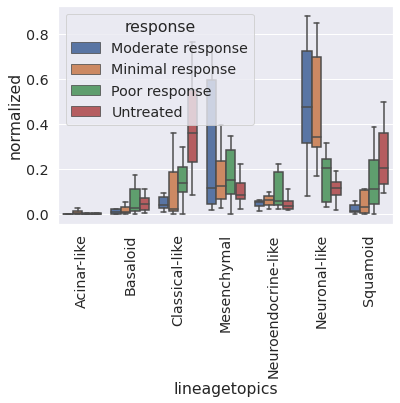

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Squamoid	26	0.000560
Minimal response	Poor response	Squamoid	26	0.138563
Minimal response	Moderate response	Squamoid	31	0.263051
Untreated	Minimal response	Squamoid	26	0.000560
Untreated	Poor response	Squamoid	35	0.048019
Untreated	Moderate response	Squamoid	0	0.000078
Poor response	Minimal response	Squamoid	26	0.138563
Poor response	Untreated	Squamoid	35	0.048019
Poor response	Moderate response	Squamoid	9	0.027642
Moderate response	Minimal response	Squamoid	31	0.263051
Moderate response	Untreated	Squamoid	0	0.000078
Moderate response	Poor response	Squamoid	9	0.027642
Minimal response	Untreated	Basaloid	49	0.013045
Minimal response	Poor response	Basaloid	27	0.159568
Minimal response	Moderate response	Basaloid	30	0.248379
Untreated	Minimal response	Basaloid	49	0.013045
Untreated	Poor response	Basaloid	57	0.369614
Untreated	Moderate response	Basaloid	24	0.009900
Poor response	Minimal response	Basaloid	27	0.159568
Poor response	Untreated	Basaloid	57	0.369614
Poo

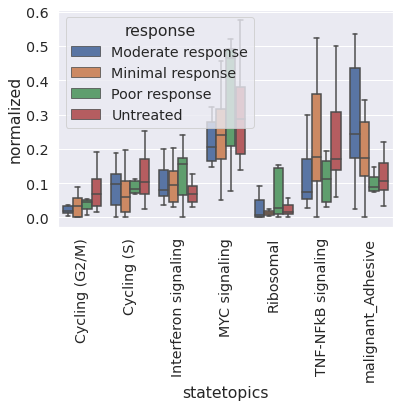

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Interferon signaling	81	0.215768
Minimal response	Poor response	Interferon signaling	32	0.293427
Minimal response	Moderate response	Interferon signaling	38	0.500000
Untreated	Minimal response	Interferon signaling	81	0.215768
Untreated	Poor response	Interferon signaling	43	0.118962
Untreated	Moderate response	Interferon signaling	48	0.190086
Poor response	Minimal response	Interferon signaling	32	0.293427
Poor response	Untreated	Interferon signaling	43	0.118962
Poor response	Moderate response	Interferon signaling	21	0.350739
Moderate response	Minimal response	Interferon signaling	38	0.500000
Moderate response	Untreated	Interferon signaling	48	0.190086
Moderate response	Poor response	Interferon signaling	21	0.350739
Minimal response	Untreated	Cycling (G2/M)	57	0.031055
Minimal response	Poor response	Cycling (G2/M)	30	0.234254
Minimal response	Moderate response	Cycling (G2/M)	36	0.428095
Untreated	Minimal response	Cycling (G2/M)	57	0.031055
Untreated	Poor respons

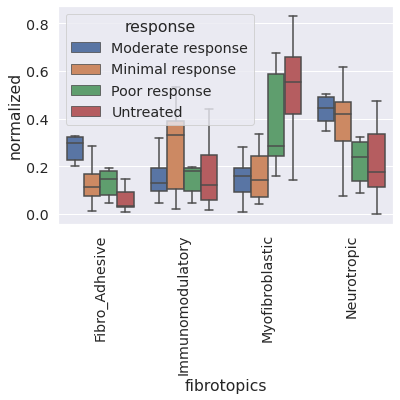

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Neurotropic	50	0.014632
Minimal response	Poor response	Neurotropic	21	0.061825
Minimal response	Moderate response	Neurotropic	33	0.325334
Untreated	Minimal response	Neurotropic	50	0.014632
Untreated	Poor response	Neurotropic	58	0.392676
Untreated	Moderate response	Neurotropic	27	0.015835
Poor response	Minimal response	Neurotropic	21	0.061825
Poor response	Untreated	Neurotropic	58	0.392676
Poor response	Moderate response	Neurotropic	13	0.079932
Moderate response	Minimal response	Neurotropic	33	0.325334
Moderate response	Untreated	Neurotropic	27	0.015835
Moderate response	Poor response	Neurotropic	13	0.079932
Minimal response	Untreated	Fibro_Adhesive	52	0.018308
Minimal response	Poor response	Fibro_Adhesive	35	0.392926
Minimal response	Moderate response	Fibro_Adhesive	10	0.005608
Untreated	Minimal response	Fibro_Adhesive	52	0.018308
Untreated	Poor response	Fibro_Adhesive	24	0.009900
Untreated	Moderate response	Fibro_Adhesive	5	0.000251
Poor response	Minimal res

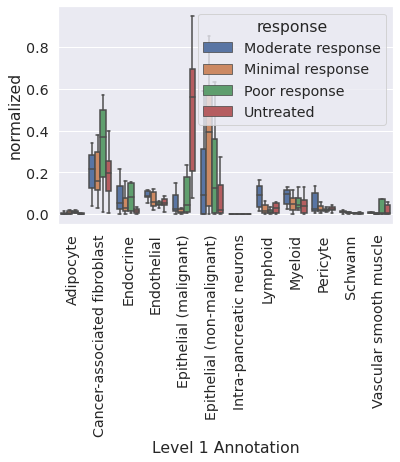

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Endothelial	84	0.257289
Minimal response	Poor response	Endothelial	34	0.358576
Minimal response	Moderate response	Endothelial	27	0.159568
Untreated	Minimal response	Endothelial	84	0.257289
Untreated	Poor response	Endothelial	58	0.392676
Untreated	Moderate response	Endothelial	21	0.006008
Poor response	Minimal response	Endothelial	34	0.358576
Poor response	Untreated	Endothelial	58	0.392676
Poor response	Moderate response	Endothelial	7	0.014921
Moderate response	Minimal response	Endothelial	27	0.159568
Moderate response	Untreated	Endothelial	21	0.006008
Moderate response	Poor response	Endothelial	7	0.014921
Minimal response	Untreated	Intra-pancreatic neurons	88	0.252565
Minimal response	Poor response	Intra-pancreatic neurons	35	0.354555
Minimal response	Moderate response	Intra-pancreatic neurons	38	0.500000
Untreated	Minimal response	Intra-pancreatic neurons	88	0.252565
Untreated	Poor response	Intra-pancreatic neurons	63	0.481100
Untreated	Moderate response	Int

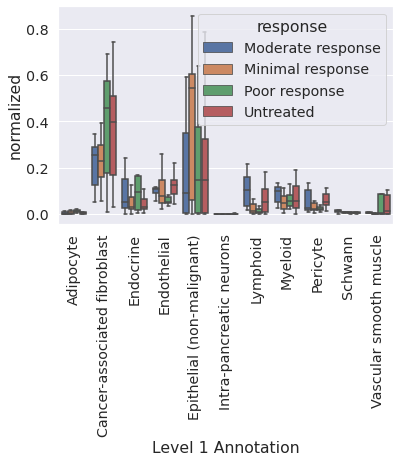

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Endothelial	74	0.135406
Minimal response	Poor response	Endothelial	28	0.182556
Minimal response	Moderate response	Endothelial	34	0.358576
Untreated	Minimal response	Endothelial	74	0.135406
Untreated	Poor response	Endothelial	18	0.003538
Untreated	Moderate response	Endothelial	47	0.174096
Poor response	Minimal response	Endothelial	28	0.182556
Poor response	Untreated	Endothelial	18	0.003538
Poor response	Moderate response	Endothelial	8	0.020457
Moderate response	Minimal response	Endothelial	34	0.358576
Moderate response	Untreated	Endothelial	47	0.174096
Moderate response	Poor response	Endothelial	8	0.020457
Minimal response	Untreated	Intra-pancreatic neurons	91	0.317027
Minimal response	Poor response	Intra-pancreatic neurons	35	0.354555
Minimal response	Moderate response	Intra-pancreatic neurons	38	0.500000
Untreated	Minimal response	Intra-pancreatic neurons	91	0.317027
Untreated	Poor response	Intra-pancreatic neurons	62	0.481100
Untreated	Moderate response	Int

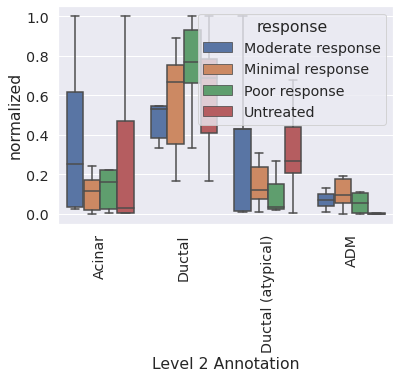

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Ductal	69	0.350753
Minimal response	Poor response	Ductal	21	0.123883
Minimal response	Moderate response	Ductal	25	0.410377
Untreated	Minimal response	Ductal	69	0.350753
Untreated	Poor response	Ductal	31	0.204658
Untreated	Moderate response	Ductal	28	0.273659
Poor response	Minimal response	Ductal	21	0.123883
Poor response	Untreated	Ductal	31	0.204658
Poor response	Moderate response	Ductal	7	0.100108
Moderate response	Minimal response	Ductal	25	0.410377
Moderate response	Untreated	Ductal	28	0.273659
Moderate response	Poor response	Ductal	7	0.100108
Minimal response	Untreated	Ductal (atypical)	43	0.060369
Minimal response	Poor response	Ductal (atypical)	10	0.223436
Minimal response	Moderate response	Ductal (atypical)	20	0.290771
Untreated	Minimal response	Ductal (atypical)	43	0.060369
Untreated	Poor response	Ductal (atypical)	9	0.073688
Untreated	Moderate response	Ductal (atypical)	34	0.500000
Poor response	Minimal response	Ductal (atypical)	10	0.223436
Poor res

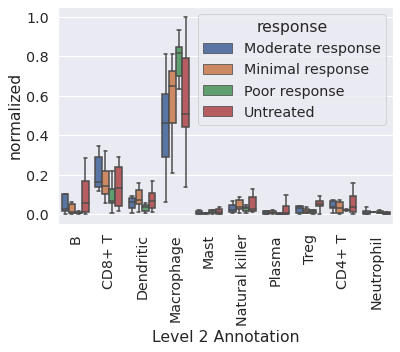

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Macrophage	91	0.368005
Minimal response	Poor response	Macrophage	14	0.014868
Minimal response	Moderate response	Macrophage	27	0.159568
Untreated	Minimal response	Macrophage	91	0.368005
Untreated	Poor response	Macrophage	29	0.021285
Untreated	Moderate response	Macrophage	48	0.190040
Poor response	Minimal response	Macrophage	14	0.014868
Poor response	Untreated	Macrophage	29	0.021285
Poor response	Moderate response	Macrophage	5	0.007597
Moderate response	Minimal response	Macrophage	27	0.159568
Moderate response	Untreated	Macrophage	48	0.190040
Moderate response	Poor response	Macrophage	5	0.007597
Minimal response	Untreated	Natural killer	42	0.298282
Minimal response	Poor response	Natural killer	25	0.176936
Minimal response	Moderate response	Natural killer	26	0.203407
Untreated	Minimal response	Natural killer	42	0.298282
Untreated	Poor response	Natural killer	29	0.295722
Untreated	Moderate response	Natural killer	28	0.262931
Poor response	Minimal response	Natural

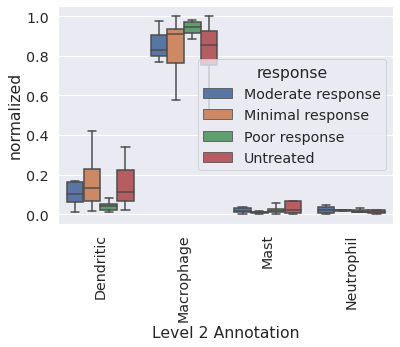

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Macrophage	89	0.342897
Minimal response	Poor response	Macrophage	22	0.073659
Minimal response	Moderate response	Macrophage	37	0.463918
Untreated	Minimal response	Macrophage	89	0.342897
Untreated	Poor response	Macrophage	28	0.018397
Untreated	Moderate response	Macrophage	62	0.487929
Poor response	Minimal response	Macrophage	22	0.073659
Poor response	Untreated	Macrophage	28	0.018397
Poor response	Moderate response	Macrophage	9	0.027642
Moderate response	Minimal response	Macrophage	37	0.463918
Moderate response	Untreated	Macrophage	62	0.487929
Moderate response	Poor response	Macrophage	9	0.027642
Minimal response	Untreated	Mast	21	0.144911
Minimal response	Poor response	Mast	11	0.318301
Minimal response	Moderate response	Mast	12	0.112319
Untreated	Minimal response	Mast	21	0.144911
Untreated	Poor response	Mast	14	0.294577
Untreated	Moderate response	Mast	26	0.476506
Poor response	Minimal response	Mast	11	0.318301
Poor response	Untreated	Mast	14	0.294577
Poor resp

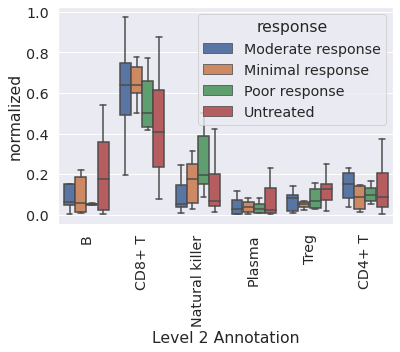

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Natural killer	39	0.213678
Minimal response	Poor response	Natural killer	27	0.232107
Minimal response	Moderate response	Natural killer	21	0.093841
Untreated	Minimal response	Natural killer	39	0.213678
Untreated	Poor response	Natural killer	17	0.043834
Untreated	Moderate response	Natural killer	31	0.366339
Poor response	Minimal response	Natural killer	27	0.232107
Poor response	Untreated	Natural killer	17	0.043834
Poor response	Moderate response	Natural killer	8	0.020457
Moderate response	Minimal response	Natural killer	21	0.093841
Moderate response	Untreated	Natural killer	31	0.366339
Moderate response	Poor response	Natural killer	8	0.020457
Minimal response	Untreated	Plasma	42	0.450692
Minimal response	Poor response	Plasma	18	0.412626
Minimal response	Moderate response	Plasma	13	0.335291
Untreated	Minimal response	Plasma	42	0.450692
Untreated	Poor response	Plasma	25	0.410377
Untreated	Moderate response	Plasma	16	0.236357
Poor response	Minimal response	Plasma	

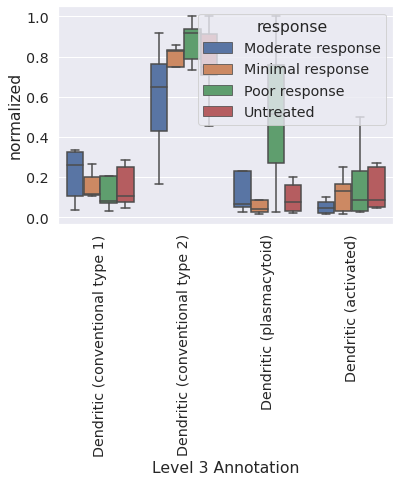

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


Minimal response	Untreated	Dendritic (conventional type 2)	71	0.500000
Minimal response	Poor response	Dendritic (conventional type 2)	13	0.114813
Minimal response	Moderate response	Dendritic (conventional type 2)	23	0.198377
Untreated	Minimal response	Dendritic (conventional type 2)	71	0.500000
Untreated	Poor response	Dendritic (conventional type 2)	24	0.107003
Untreated	Moderate response	Dendritic (conventional type 2)	31	0.050649
Poor response	Minimal response	Dendritic (conventional type 2)	13	0.114813
Poor response	Untreated	Dendritic (conventional type 2)	24	0.107003
Poor response	Moderate response	Dendritic (conventional type 2)	4	0.017378
Moderate response	Minimal response	Dendritic (conventional type 2)	23	0.198377
Moderate response	Untreated	Dendritic (conventional type 2)	31	0.050649
Moderate response	Poor response	Dendritic (conventional type 2)	4	0.017378
Minimal response	Untreated	Dendritic (activated)	34	0.297931
Minimal response	Poor response	Dendritic (activated)	18	0.4

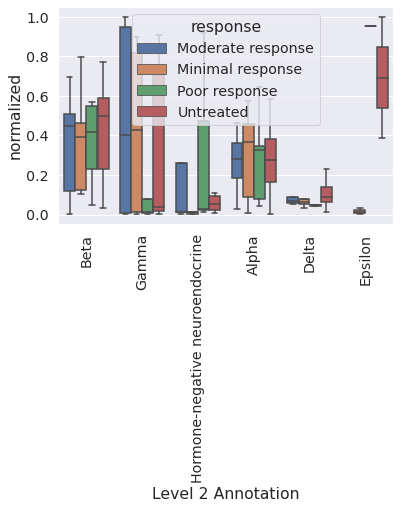

Minimal response	Untreated	Hormone-negative neuroendocrine	9	0.050206
Minimal response	Poor response	Hormone-negative neuroendocrine	3	0.055306
Minimal response	Moderate response	Hormone-negative neuroendocrine	8	0.149309
Untreated	Minimal response	Hormone-negative neuroendocrine	9	0.050206
Untreated	Poor response	Hormone-negative neuroendocrine	9	0.448639
Untreated	Moderate response	Hormone-negative neuroendocrine	8	0.227773
Poor response	Minimal response	Hormone-negative neuroendocrine	3	0.055306
Poor response	Untreated	Hormone-negative neuroendocrine	9	0.448639
Poor response	Moderate response	Hormone-negative neuroendocrine	5	0.429842
Moderate response	Minimal response	Hormone-negative neuroendocrine	8	0.149309
Moderate response	Untreated	Hormone-negative neuroendocrine	8	0.227773
Moderate response	Poor response	Hormone-negative neuroendocrine	5	0.429842
Minimal response	Untreated	Alpha	44	0.393568
Minimal response	Poor response	Alpha	19	0.470826
Minimal response	Moderate response	A

<ipython-input-32-8d31e79cd515>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-32-8d31e79cd515>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


<Figure size 432x288 with 0 Axes>

In [32]:
annots = ['lineagetopics', 'statetopics', 'fibrotopics', 'Level 1 Annotation', 'NoMalignant', 'Epithelial (non-malignant)', 'Immune', 'Myeloid', 'Lymphoid', 'Dendritic', 'Endocrine',]
total_topic_output = []
for a in annots:
    outkey = a
    if a in ['Myeloid', 'Lymphoid', 'Endocrine', 'Epithelial (non-malignant)']:
        subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']==a].copy()
        a = 'Level 2 Annotation'
    elif a in ['Dendritic']:
        subset = combinenaivedata[combinenaivedata.obs['Level 2 Annotation']==a].copy()
        a = 'Level 3 Annotation'
    elif a in ['NoMalignant']:
        subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='Epithelial (malignant)'].copy()
        a = 'Level 1 Annotation'
    elif a == 'Immune':
        subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation']=='Myeloid')|(combinenaivedata.obs['Level 1 Annotation']=='Lymphoid')].copy()
        a = 'Level 2 Annotation'
    else:
        subset = combinenaivedata
    
    if a in ['lineagetopics', 'statetopics', 'statetopics_collapsed', 'fibrotopics']:
        if a in ['fibrotopics']:
            mapping = fibro_topic_map
        elif a in ['lineagetopics']:
            mapping = malignant_lineagetopic_map
        elif a in ['statetopics']:
            mapping = malignant_statetopic_map
        elif a in ['statetopics_collapsed']:
            mapping = malignant_condensed_statetopic_map
            
        print(subset.shape)
        df = subset.obs[['pid', 'response', 'total_counts', a] + list(mapping.values())]
        print(mapping.values())
        #df = df[~df[a].str.startswith('ZZ')]
        df.pop(a)

        # un pivot
        df.pop('total_counts')
        df = df.melt(id_vars=['pid','response'], var_name=a, value_name='total_counts')
        total = df.groupby(['pid', 'response']).agg({'total_counts':'sum'}).to_dict()['total_counts']
        
        df = df[df.response!='Other']
        df = df.groupby(['pid', 'response', a]).agg('sum').reset_index()
        df['overall'] = [total.get((pid, resp)) for pid, resp in zip(df['pid'], df['response'])]
        df = df[~df.overall.isna()]
        df['normalized'] = df['total_counts']/df['overall']
        #df['normalized'] = df.normalized.fillna(0)
        sns.boxplot(data=df, x=a, y='normalized', hue='response', showfliers=False)
        plt.xticks(rotation=90)
        plt.show()
        plt.clf()
    else:
        print(subset.shape)
        df = subset.obs[['pid', 'response', 'total_counts'] + [a]]
        total = df.groupby(['pid', 'response']).agg({'total_counts':'count'}).to_dict()['total_counts']
        df = df[df.response!='Other']
        df = df.groupby(['pid', 'response', a]).agg('count').reset_index()
        df['overall'] = [total.get((pid, resp)) for pid, resp in zip(df['pid'], df['response'])]
        df = df[~df.overall.isna()]
        df['normalized'] = df['total_counts']/df['overall']
        #df['normalized'] = df.normalized.fillna(0)
        sns.boxplot(data=df, x=a, y='normalized', hue='response', showfliers=False)
        plt.xticks(rotation=90)
        plt.show()
        plt.clf()
        df['total_counts'] = df['total_counts'].fillna(0)
        df['normalized'] = df['normalized'].fillna(0)

    tmp = df.copy()
    tmp.columns = ['pid', 'response', 'topics', 'total_counts', 'overall', 'normalized']
    total_topic_output.append(tmp)
    df.to_csv('/ahg/regevdata/projects/Pancreas/src/results/%s.csv'%outkey)
        
    for topic in set(df[a]):
        for treatmentstatus1 in set(df.response):
            for treatmentstatus2 in set(df.response):
                if treatmentstatus1!=treatmentstatus2:
                    data1 = df[(df.response==treatmentstatus1)&(df[a]==topic)]
                    data2 = df[(df.response==treatmentstatus2)&(df[a]==topic)]
                    data1['normalized'] = data1['normalized'].fillna(0)
                    data2['normalized'] = data2['normalized'].fillna(0)
                    if np.sum(data1['normalized'].values)==0 and np.sum(data2['normalized'].values)==0:
                        continue
                    else:
                        U1, p = mannwhitneyu(data1['normalized'].values, data2['normalized'].values)
                    #if p < .05:
                    print("%s\t%s\t%s\t%d\t%5f"%(treatmentstatus1, treatmentstatus2, topic, U1, p))

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/data_visualization.py:331: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


MCMC sampling finished. (88.031 sec)
Acceptance rate: 0.0%
Compositional Analysis summary (extended):

Data: 32 samples, 30 cell types
Reference index: 25
Formula: treatment
Spike-and-slab threshold: 0.713

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 88.031 sec. Acceptance rate: 0.0%

Intercepts:
                                 Final Parameter  HDI 5%  HDI 95%   SD  \
Cell Type                                                                
ADM                                        1.032   1.032    1.032  0.0   
Acinar                                     0.076   0.076    0.076  0.0   
Adipocyte                                  0.078   0.078    0.078  0.0   
Alpha                                     -0.481  -0.481   -0.481  0.0   
B                                         -2.731  -2.731   -2.731  0.0   
Beta                                      -2.708  -2.708   -2.708  0.0   
CAF                                       -0.232  -0.232   -0.232  0.0   
CD4+ T       

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None

Covariate               Cell Type                      
treatment[T.Untreated]  ADM                                 True
                        Acinar                              True
                        Adipocyte                           True
                        Alpha                               True
                        B                                   True
                        Beta                                True
                        CAF                                 True
                        CD4+ T                              True
                        CD8+ T                              True
                        Delta                               True
                        Dendritic                           True
                        Ductal                              True
                        Ductal (atypical)                   True
                        Epsilon                             True
                        Gamma     

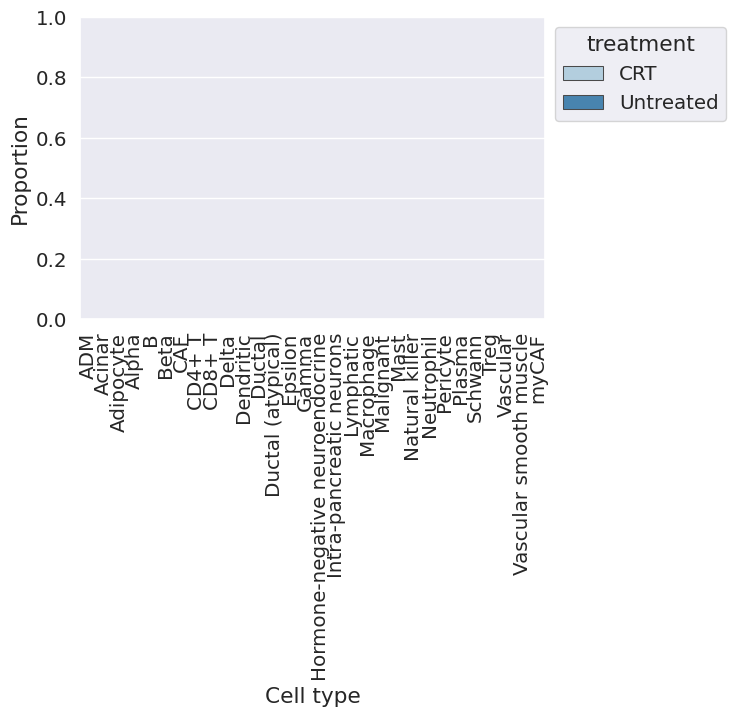

In [64]:
dirichlet_multinomial(subset, 'Level 2 Annotation', 'CRT', 'Schwann')

In [29]:
pd.concat(total_topic_output).pivot(index='pid', columns='topics', values='normalized').fillna(0).to_csv('for_threeway.csv')

# load data

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_similarity_score

In [10]:
"""
['Mesenchymal cytoskeletal', 'Epithelial ("basal-like A")','Classical progenitor', 'Classical activated','Mesenchymal matrisomal']
['Epithelial','Mesenchymal', 'Induced basal-like','Classical Neuroendocrine-like','Classical progenitor','Classical acinar-like']

Cycling	Mesenchymal cytoskeletal	Epithelial ("basal-like A")	Classical progenitor	Classical activated	Mesenchymal matrisomal	TNF-NFkB Signaling	Interferon Signaling	Hypoxic
Epithelial	TNF-NFkB Signaling	Mesenchymal	Cycling	Induced basal-like	Classical Neuroendocrine-like	Classical progenitor	Classical acinar-like	Interferon Signaling
"""

topiccategories = {
    'basal':['Epithelial','Mesenchymal', 'Induced basal-like', 'Mesenchymal cytoskeletal', 'Epithelial ("basal-like A")', 'Mesenchymal matrisomal'],
    'classical':['Classical Neuroendocrine-like','Classical acinar-like','Classical progenitor', 'Classical activated'],
}

In [11]:
def get_topic_subset(X, adata, topic_names, topic_nums, prefix):
    subset_X = X[topic_nums]
    subset_X.columns = topic_names
    subset_X = subset_X.div(subset_X.sum(axis=1), axis=0)
      
    for col in subset_X.columns:
        adata.obs[col] = subset_X[col]
    
    adata.obs[prefix+'_totalHI'] = 1 - (np.sum((subset_X - 1/num_topics)**2, axis=1)/(1-1/num_topics))
    sc.pl.umap(adata, color=topic_names + ['pid'], color_map='Reds')
    
    sns.stripplot(x="pid", y=prefix+"_totalHI", data=adata.obs)
    sns.boxplot(x="pid", y=prefix+"_totalHI", data=adata.obs)
    plt.show()
    
    adata.obs[prefix+'_totaltopic'] = [topic_names[val] for val in np.argmax(subset_X.values, axis=1)]
    sns.stripplot(x=prefix+"_totaltopic", y=prefix+"_totalHI", data=adata.obs)
    sns.boxplot(x=prefix+"_totaltopic", y=prefix+"_totalHI", data=adata.obs)
    plt.show()
    
    corr = subset_X.corr()
    ax = sns.clustermap(corr,vmin=-1,vmax=1,center=0,
                        cmap=sns.diverging_palette(20, 220, n=200),square=True)
    plt.show()

    count_df = adata.obs[['pid', 'cell_subsets', 'detailed_cell_subsets', prefix+'_totaltopic'] + topic_names].groupby(['pid']).agg({'cell_subsets':'count'}).reset_index()
    pid2count = count_df.set_index('pid').to_dict()['cell_subsets']

    violin_df = adata.obs[['pid', prefix+'_totaltopic', 'cell_subsets']].groupby(['pid', prefix+'_totaltopic']).agg('count').reset_index()
    violin_df['total'] = [pid2count[pid] for pid in violin_df['pid']]
    violin_df['normed'] = violin_df['cell_subsets']/violin_df['total']
    display(violin_df)

    """violin_df = adata.obs[['pid'] + topic_names].groupby(['pid']).agg(sum).reset_index()
    violin_df['total'] = [pid2count[pid] for pid in violin_df['pid']]
    for topic_name in topic_names:
        violin_df['normed_%s'%topic_name] = violin_df[topic_name]/violin_df['total']"""
    violin_df.pivot(index='pid', columns=prefix+'_totaltopic', values='normed').fillna(0).to_csv("/ahg/regevdata/projects/Pancreas/src/data/pid_topic_%s_counts.csv"%datatype, sep="\t")

    display(scp.composition_plot(adata, 'pid', prefix+'_totaltopic'))
    return adata, subset_X

In [ ]:

adata, subset_X = get_topic_subset(X, adata, topic_names, topic_nums, 'all')

basal
Index(['Myofibroblast', 'Neurotropic', 'Secretory', 'Mesodermal Progenitor'], dtype='object')
set()
classical
Index(['Myofibroblast', 'Neurotropic', 'Secretory', 'Mesodermal Progenitor'], dtype='object')
set()


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


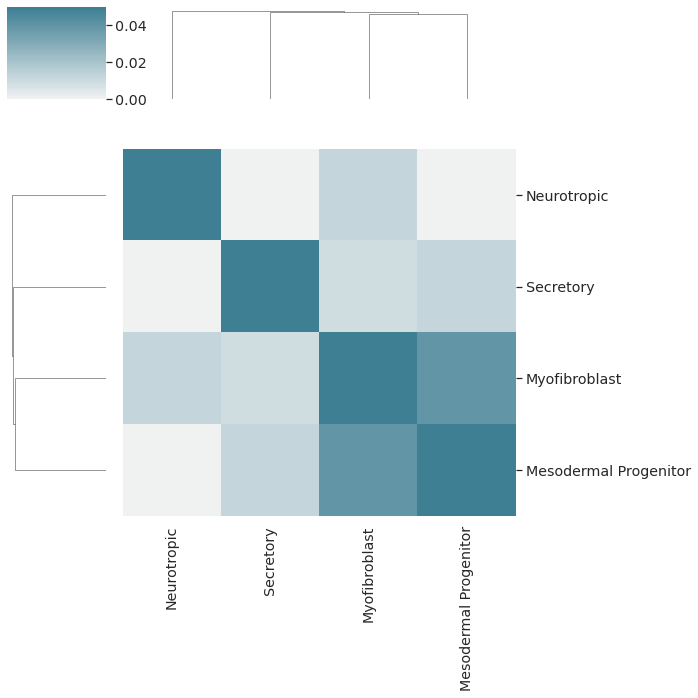

Myofibroblast  Neurotropic  Secretory  \
Myofibroblast               1.000000     0.012195   0.009009   
Neurotropic                 0.012195     1.000000   0.000000   
Secretory                   0.009009     0.000000   1.000000   
Mesodermal Progenitor       0.039648     0.000000   0.012346   

                       Mesodermal Progenitor  
Myofibroblast                       0.039648  
Neurotropic                         0.000000  
Secretory                           0.012346  
Mesodermal Progenitor               1.000000

In [46]:
naive_selected_genes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/cNMF/naive_fibroblast_cNMF/selected_genes.txt', sep='\t')
gene_union = defaultdict(set)
for cat in topiccategories.keys():
    print(cat)
    print(naive_selected_genes.columns)
    print(set(topiccategories[cat]).intersection(set(naive_selected_genes.columns)))
    for topic in topiccategories[cat]:
        if topic in naive_selected_genes.columns:
            gene_union[cat].update(naive_selected_genes[topic].tolist())
            
out = np.zeros((naive_selected_genes.shape[1], naive_selected_genes.shape[1]))
for i, col1 in enumerate(naive_selected_genes.columns):
    x = set(naive_selected_genes[col1])
    x.add(np.nan)
    x.remove(np.nan)
    for j, col2 in enumerate(naive_selected_genes.columns):
        y = set(naive_selected_genes[col2])
        y.add(np.nan)
        y.remove(np.nan)
        out[i,j] = len(x.intersection(y))/len(x.union(y))
out = pd.DataFrame(data=out, index=naive_selected_genes.columns, columns=naive_selected_genes.columns)
ax = sns.clustermap(out, center=0, cmap=sns.diverging_palette(20, 220, n=200), vmax=0.05, square=True)
plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.savefig('/ahg/regevdata/projects/Pancreas/src/cNMF/naive_fibroblast_similarity.pdf')


plt.show()
out

basal
Index(['Myofibroblast', 'Secretory', 'Neuromuscular', 'Neurotropic'], dtype='object')
set()
classical
Index(['Myofibroblast', 'Secretory', 'Neuromuscular', 'Neurotropic'], dtype='object')
set()


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


Myofibroblast  Secretory  Neuromuscular  Neurotropic
Myofibroblast            1.0        0.0            0.0          0.0
Secretory                0.0        1.0            0.0          0.0
Neuromuscular            0.0        0.0            1.0          0.0
Neurotropic              0.0        0.0            0.0          1.0

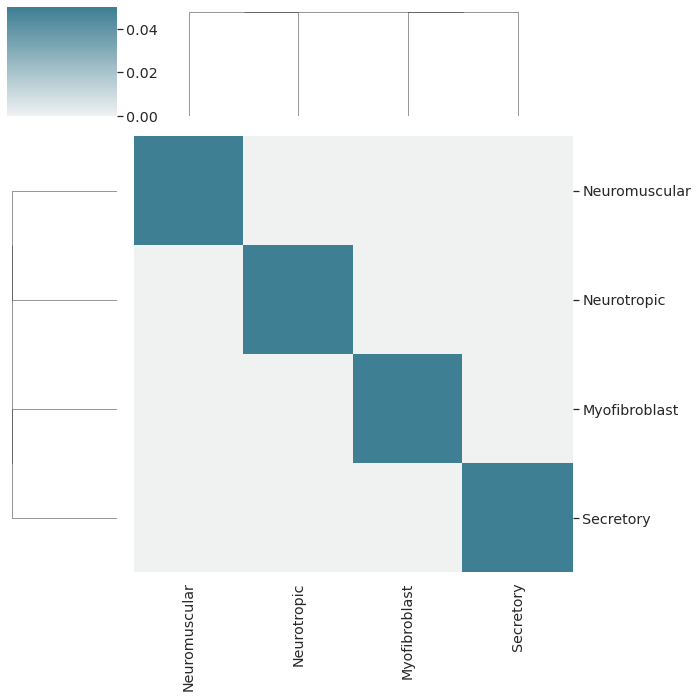

In [47]:
naive_selected_genes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/cNMF/treated_fibroblast_cNMF/selected_genes.txt', sep='\t')
gene_union = defaultdict(set)
for cat in topiccategories.keys():
    print(cat)
    print(naive_selected_genes.columns)
    print(set(topiccategories[cat]).intersection(set(naive_selected_genes.columns)))
    for topic in topiccategories[cat]:
        if topic in naive_selected_genes.columns:
            gene_union[cat].update(naive_selected_genes[topic].tolist())
            
out = np.zeros((naive_selected_genes.shape[1], naive_selected_genes.shape[1]))
for i, col1 in enumerate(naive_selected_genes.columns):
    x = set(naive_selected_genes[col1])
    x.add(np.nan)
    x.remove(np.nan)
    for j, col2 in enumerate(naive_selected_genes.columns):
        y = set(naive_selected_genes[col2])
        y.add(np.nan)
        y.remove(np.nan)
        out[i,j] = len(x.intersection(y))/len(x.union(y))
out = pd.DataFrame(data=out, index=naive_selected_genes.columns, columns=naive_selected_genes.columns)
ax = sns.clustermap(out,vmin=0,center=0,
                        cmap=sns.diverging_palette(20, 220, n=200), vmax=0.05, square=True)

plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('/ahg/regevdata/projects/Pancreas/src/cNMF/treated_fibroblast_similarity.pdf')
out

basal
Index(['Cycling', 'Mesenchymal cytoskeletal', 'Epithelial ("basal-like A")',
       'Classical progenitor', 'Classical activated', 'Mesenchymal matrisomal',
       'TNF-NFkB Signaling', 'Interferon Signaling', 'Hypoxic'],
      dtype='object')
{'Epithelial ("basal-like A")', 'Mesenchymal cytoskeletal', 'Mesenchymal matrisomal'}
classical
Index(['Cycling', 'Mesenchymal cytoskeletal', 'Epithelial ("basal-like A")',
       'Classical progenitor', 'Classical activated', 'Mesenchymal matrisomal',
       'TNF-NFkB Signaling', 'Interferon Signaling', 'Hypoxic'],
      dtype='object')
{'Classical activated', 'Classical progenitor'}


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


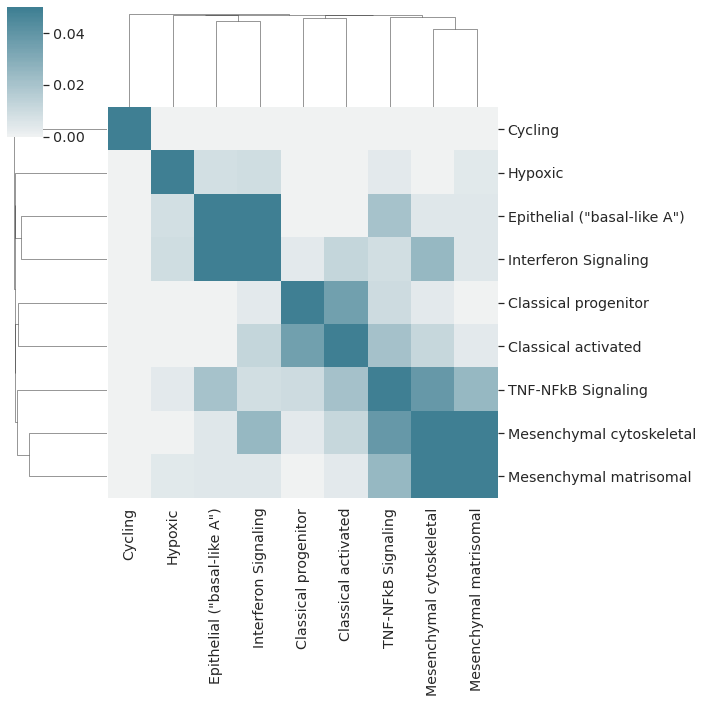

Cycling  Mesenchymal cytoskeletal  \
Cycling                          1.0                  0.000000   
Mesenchymal cytoskeletal         0.0                  1.000000   
Epithelial ("basal-like A")      0.0                  0.004673   
Classical progenitor             0.0                  0.003650   
Classical activated              0.0                  0.011905   
Mesenchymal matrisomal           0.0                  0.156757   
TNF-NFkB Signaling               0.0                  0.038627   
Interferon Signaling             0.0                  0.025510   
Hypoxic                          0.0                  0.000000   

                             Epithelial ("basal-like A")  \
Cycling                                         0.000000   
Mesenchymal cytoskeletal                        0.004673   
Epithelial ("basal-like A")                     1.000000   
Classical progenitor                            0.000000   
Classical activated                             0.000000   
Mesenchymal matrisomal                          0.004587   
TNF-NFkB Signaling                              0.020661   
Interferon Signaling                            0.067358   
Hypoxic                                         0.008511   

                             Classical progenitor  Classical activated  \
Cycling                                  0.000000             0.000000   
Mesenchymal cytoskeletal                 0.003650             0.011905   
Epithelial ("basal-like A")              0.000000             0.000000   
Classical progenitor                     1.000000             0.035599   
Classical activated                      0.035599             1.000000   
Mesenchymal matrisomal                   0.000000             0.003876   
TNF-NFkB Signaling                       0.009868             0.021352   
Interferon Signaling                     0.003774             0.012346   
Hypoxic                                  0.000000             0.000000   

                             Mesenchymal matrisomal  TNF-NFkB Signaling  \
Cycling                                    0.000000            0.000000   
Mesenchymal cytoskeletal                   0.156757            0.038627   
Epithelial ("basal-like A")                0.004587            0.020661   
Classical progenitor                       0.000000            0.009868   
Classical activated                        0.003876            0.021352   
Mesenchymal matrisomal                     1.000000            0.025000   
TNF-NFkB Signaling                         0.025000            1.000000   
Interferon Signaling                       0.004902            0.008658   
Hypoxic                                    0.004255            0.003802   

                             Interferon Signaling   Hypoxic  
Cycling                                  0.000000  0.000000  
Mesenchymal cytoskeletal                 0.025510  0.000000  
Epithelial ("basal-like A")              0.067358  0.008511  
Classical progenitor                     0.003774  0.000000  
Classical activated                      0.012346  0.000000  
Mesenchymal matrisomal                   0.004902  0.004255  
TNF-NFkB Signaling                       0.008658  0.003802  
Interferon Signaling                     1.000000  0.009050  
Hypoxic                                  0.009050  1.000000

In [48]:
naive_selected_genes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/cNMF/naive_tumor_cNMF/selected_genes.txt', sep='\t')
gene_union = defaultdict(set)
for cat in topiccategories.keys():
    print(cat)
    print(naive_selected_genes.columns)
    print(set(topiccategories[cat]).intersection(set(naive_selected_genes.columns)))
    for topic in topiccategories[cat]:
        if topic in naive_selected_genes.columns:
            gene_union[cat].update(naive_selected_genes[topic].tolist())
            
out = np.zeros((naive_selected_genes.shape[1], naive_selected_genes.shape[1]))
for i, col1 in enumerate(naive_selected_genes.columns):
    x = set(naive_selected_genes[col1])
    x.add(np.nan)
    x.remove(np.nan)
    for j, col2 in enumerate(naive_selected_genes.columns):
        y = set(naive_selected_genes[col2])
        y.add(np.nan)
        y.remove(np.nan)
        out[i,j] = len(x.intersection(y))/len(x.union(y))
out = pd.DataFrame(data=out, index=naive_selected_genes.columns, columns=naive_selected_genes.columns)
ax = sns.clustermap(out,vmin=0,center=0,
                        cmap=sns.diverging_palette(20, 220, n=200), vmax=0.05, square=True)
plt.show()
out

basal
Index(['Epithelial', 'TNF-NFkB Signaling', 'Mesenchymal', 'Cycling',
       'Induced basal-like', 'Classical Neuroendocrine-like',
       'Classical progenitor', 'Classical acinar-like',
       'Interferon Signaling'],
      dtype='object')
{'Mesenchymal', 'Induced basal-like', 'Epithelial'}
classical
Index(['Epithelial', 'TNF-NFkB Signaling', 'Mesenchymal', 'Cycling',
       'Induced basal-like', 'Classical Neuroendocrine-like',
       'Classical progenitor', 'Classical acinar-like',
       'Interferon Signaling'],
      dtype='object')
{'Classical acinar-like', 'Classical Neuroendocrine-like', 'Classical progenitor'}


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


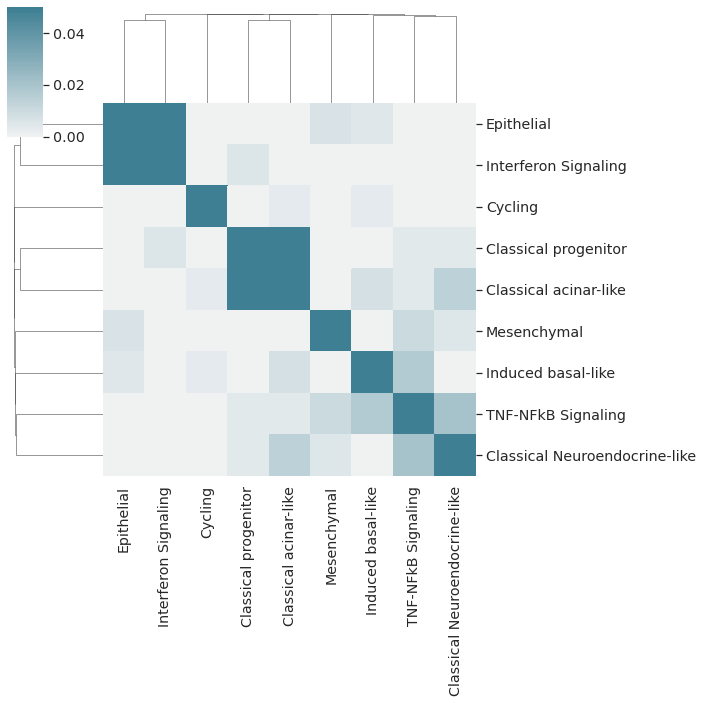

Epithelial  TNF-NFkB Signaling  Mesenchymal  \
Epithelial                       1.000000            0.000000     0.006250   
TNF-NFkB Signaling               0.000000            1.000000     0.010152   
Mesenchymal                      0.006250            0.010152     1.000000   
Cycling                          0.000000            0.000000     0.000000   
Induced basal-like               0.005051            0.017167     0.000000   
Classical Neuroendocrine-like    0.000000            0.020619     0.005376   
Classical progenitor             0.000000            0.004219     0.000000   
Classical acinar-like            0.000000            0.004444     0.000000   
Interferon Signaling             0.063158            0.000000     0.000000   

                                Cycling  Induced basal-like  \
Epithelial                     0.000000            0.005051   
TNF-NFkB Signaling             0.000000            0.017167   
Mesenchymal                    0.000000            0.000000   
Cycling                        1.000000            0.003333   
Induced basal-like             0.003333            1.000000   
Classical Neuroendocrine-like  0.000000            0.000000   
Classical progenitor           0.000000            0.000000   
Classical acinar-like          0.003460            0.007968   
Interferon Signaling           0.000000            0.000000   

                               Classical Neuroendocrine-like  \
Epithelial                                          0.000000   
TNF-NFkB Signaling                                  0.020619   
Mesenchymal                                         0.005376   
Cycling                                             0.000000   
Induced basal-like                                  0.000000   
Classical Neuroendocrine-like                       1.000000   
Classical progenitor                                0.004444   
Classical acinar-like                               0.014218   
Interferon Signaling                                0.000000   

                               Classical progenitor  Classical acinar-like  \
Epithelial                                 0.000000               0.000000   
TNF-NFkB Signaling                         0.004219               0.004444   
Mesenchymal                                0.000000               0.000000   
Cycling                                    0.000000               0.003460   
Induced basal-like                         0.000000               0.007968   
Classical Neuroendocrine-like              0.004444               0.014218   
Classical progenitor                       1.000000               0.071730   
Classical acinar-like                      0.071730               1.000000   
Interferon Signaling                       0.006024               0.000000   

                               Interferon Signaling  
Epithelial                                 0.063158  
TNF-NFkB Signaling                         0.000000  
Mesenchymal                                0.000000  
Cycling                                    0.000000  
Induced basal-like                         0.000000  
Classical Neuroendocrine-like              0.000000  
Classical progenitor                       0.006024  
Classical acinar-like                      0.000000  
Interferon Signaling                       1.000000

In [49]:
treated_selected_genes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/cNMF/treated_tumor_cNMF/selected_genes.txt', sep='\t')
gene_union = defaultdict(set)
for cat in topiccategories.keys():
    print(cat)
    print(treated_selected_genes.columns)
    print(set(topiccategories[cat]).intersection(set(treated_selected_genes.columns)))
    for topic in topiccategories[cat]:
        if topic in treated_selected_genes.columns:
            gene_union[cat].update(treated_selected_genes[topic].tolist())
            
out = np.zeros((treated_selected_genes.shape[1], treated_selected_genes.shape[1]))
for i, col1 in enumerate(treated_selected_genes.columns):
    x = set(treated_selected_genes[col1])
    x.add(np.nan)
    x.remove(np.nan)
    for j, col2 in enumerate(treated_selected_genes.columns):
        y = set(treated_selected_genes[col2])
        y.add(np.nan)
        y.remove(np.nan)
        out[i,j] = len(x.intersection(y))/len(x.union(y))
out = pd.DataFrame(data=out, index=treated_selected_genes.columns, columns=treated_selected_genes.columns)
ax = sns.clustermap(out,vmin=0,center=0,
                        cmap=sns.diverging_palette(20, 220, n=200), vmax=0.05, square=True)
plt.show()
out

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


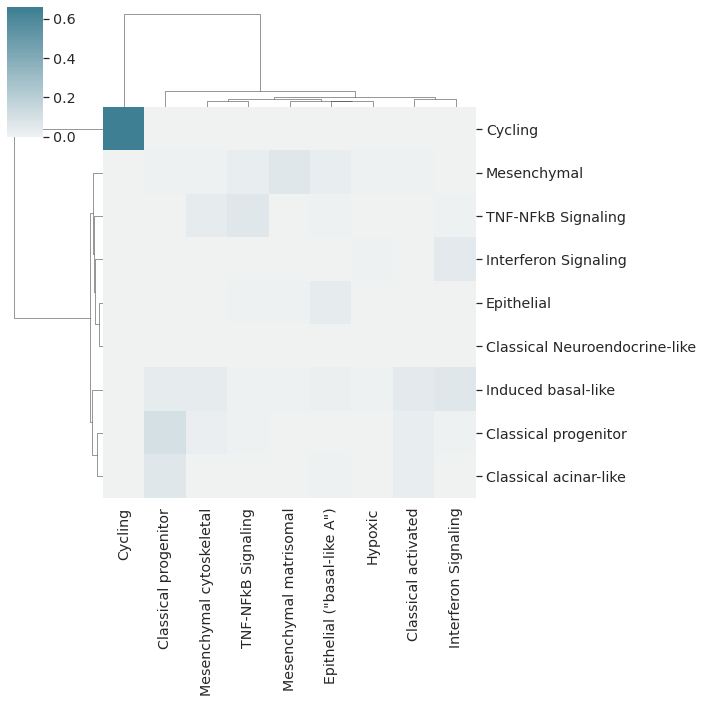

Cycling  Mesenchymal cytoskeletal  \
Epithelial                     0.000000                  0.005848   
TNF-NFkB Signaling             0.000000                  0.034483   
Mesenchymal                    0.000000                  0.015306   
Cycling                        0.658986                  0.003663   
Induced basal-like             0.003106                  0.034934   
Classical Neuroendocrine-like  0.000000                  0.005076   
Classical progenitor           0.000000                  0.021459   
Classical acinar-like          0.000000                  0.004444   
Interferon Signaling           0.000000                  0.007246   

                               Epithelial ("basal-like A")  \
Epithelial                                        0.035088   
TNF-NFkB Signaling                                0.014151   
Mesenchymal                                       0.030303   
Cycling                                           0.000000   
Induced basal-like                                0.016807   
Classical Neuroendocrine-like                     0.004950   
Classical progenitor                              0.004132   
Classical acinar-like                             0.008734   
Interferon Signaling                              0.000000   

                               Classical progenitor  Classical activated  \
Epithelial                                 0.000000             0.000000   
TNF-NFkB Signaling                         0.003650             0.000000   
Mesenchymal                                0.011494             0.008264   
Cycling                                    0.000000             0.000000   
Induced basal-like                         0.034247             0.052239   
Classical Neuroendocrine-like              0.000000             0.000000   
Classical progenitor                       0.101818             0.029091   
Classical acinar-like                      0.065934             0.030418   
Interferon Signaling                       0.000000             0.000000   

                               Mesenchymal matrisomal  TNF-NFkB Signaling  \
Epithelial                                   0.011494            0.009901   
TNF-NFkB Signaling                           0.004695            0.061404   
Mesenchymal                                  0.062827            0.031250   
Cycling                                      0.000000            0.000000   
Induced basal-like                           0.008368            0.011278   
Classical Neuroendocrine-like                0.004975            0.004367   
Classical progenitor                         0.000000            0.011236   
Classical acinar-like                        0.000000            0.003891   
Interferon Signaling                         0.000000            0.000000   

                               Interferon Signaling   Hypoxic  
Epithelial                                 0.000000  0.005181  
TNF-NFkB Signaling                         0.010050  0.004329  
Mesenchymal                                0.000000  0.013761  
Cycling                                    0.000000  0.000000  
Induced basal-like                         0.060465  0.007782  
Classical Neuroendocrine-like              0.000000  0.000000  
Classical progenitor                       0.008811  0.000000  
Classical acinar-like                      0.004630  0.000000  
Interferon Signaling                       0.048387  0.012579

In [50]:
out = np.zeros((treated_selected_genes.shape[1], naive_selected_genes.shape[1]))
for i, col1 in enumerate(treated_selected_genes.columns):
    x = set(treated_selected_genes[col1])
    x.add(np.nan)
    x.remove(np.nan)
    for j, col2 in enumerate(naive_selected_genes.columns):
        y = set(naive_selected_genes[col2])
        y.add(np.nan)
        y.remove(np.nan)
        out[i,j] = len(x.intersection(y))/len(x.union(y))
out = pd.DataFrame(data=out, index=treated_selected_genes.columns, columns=naive_selected_genes.columns)
ax = sns.clustermap(out,vmin=0,center=0,
                        cmap=sns.diverging_palette(20, 220, n=200),square=True)
plt.show()
out

In [40]:
def get_broadtopic_genes(datatype):
    selected_genes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/cNMF/%s_cNMF/selected_genes.txt'%datatype, sep='\t')
    gene_union = defaultdict(set)
    for cat in topiccategories.keys():
        for topic in topiccategories[cat]:
            if topic in selected_genes.columns:
                print(selected_genes[topic].tolist())
                gene_union[cat].update(selected_genes[topic].tolist())
    print(gene_union.keys())
    return gene_union['basal'], gene_union['classical']

In [41]:
topiccategories.keys()

dict_keys(['basal', 'classical'])

In [ ]:
treatedtumoradata = sc.read('/ahg/regevdata/projects/Pancreas/src/data/topics/treated_tumor-topic-processed.h5ad')
naivetumoradata = sc.read('/ahg/regevdata/projects/Pancreas/src/data/topics/naive_tumor-topic-processed.h5ad')

In [ ]:
sc.pl.stacked_violin(naivetumoradata, var_names=['WNT7B'], groupby='renormalized_totaltopic', rotation=90)
sc.pl.stacked_violin(treatedtumoradata, var_names=['WNT7B'], groupby='renormalized_totaltopic', rotation=90)

In [ ]:
! R /ahg/regevdata/projects/Pancreas/src/runDirichlet.R $file1 $file2 $outfile

Nanostring, Payman correlations

In [ ]:
payman_correlations = {'CYS': [-0.18, -0.37, 0.17, -0.21],
        'RIB': [-0.14, 0.11, 0.13, 0.37],
        'NEN': [-0.26, -0.38, 0.32, -0.26],
        'ADH-M': [0.21, 0.43, 0.07, 0.25],
        'MES': [0.05, 0.23, 0.04, 0.23],
        'IFN': [0.04, 0.1, 0.33, -0.13],
        'CYG': [-0.13, -0.32, 0.1, -0.19],
        'TNF': [0.27, 0.24, 0.01, 0.07],
        'CLS': [-0.01, 0.15, 0.01, 0.14],
        'ACN': [-0.17, 0.09, 0.16, 0.35],
        'MYC': [-0.16, 0.03, 0.05, 0.25],
        'NRN': [-0.3, 0.2, 0.15, -0.05],
        'BSL': [0.03, 0.25, -0.37, 0.41],
        'SQM': [0.21, 0.18, -0.45, -0.01],
        }

payman_correlations = pd.DataFrame(payman_correlations, columns = ['CYS','RIB', 'NEN', 'ADH-M', 'MES','IFN', 'CYG', 'TNF', 'CLS', 'ACN', 'MYC', 'NRN', 'BSL', 'SQM'], index=['MYO','ADH-F','NRT','IMM'])

print (payman_correlations)

In [ ]:
sns.set(font_scale=1.3)
d = sns.clustermap(payman_correlations, cmap='PuOr', linewidths = 1, linecolor='white', figsize=(7,2.85), center = 0)
d.ax_row_dendrogram.set_visible(False)
d.ax_col_dendrogram.set_visible(False)
d.savefig("payman_DSP_correlations.pdf")

In [ ]:
test_palette = sns.diverging_palette(59, 178, as_cmap=True)
sns.palplot(sns.diverging_palette(180, 10, s=100, l=25, cmap=TRUE))

Nanostring, Jason correlations

In [101]:
jason_fibro_correlations = {'IMM': [0.089272279, 0.125127631, -0.183692342],
        'NRT': [0.082906404, -0.304572324, 0.277745186],
        'ADH-F': [-0.238452754, -0.224272279, 0.400553068],
        'MYO': [-0.183911778, -0.445217197, 0.590047022],
        }

jason_fibro_correlations = pd.DataFrame(jason_fibro_correlations, columns = ['IMM','NRT', 'ADH-F', 'MYO'], index=['% Immune','% Epithelial','% CAF'])

print (jason_fibro_correlations)

                   IMM       NRT     ADH-F       MYO
% Immune      0.089272  0.082906 -0.238453 -0.183912
% Epithelial  0.125128 -0.304572 -0.224272 -0.445217
% CAF        -0.183692  0.277745  0.400553  0.590047


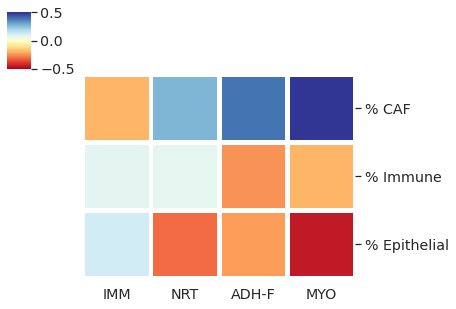

In [114]:
sns_plot = sns.clustermap(jason_fibro_correlations,cmap="RdYlBu", linewidths = 3.5, linecolor='white', figsize=(6.5, 4.34), center = 0, vmin=-.5, vmax=.5)
sns_plot.ax_row_dendrogram.set_visible(False)
sns_plot.ax_col_dendrogram.set_visible(False)
sns_plot.savefig("fibroblast_proportion_correlations.pdf")

In [86]:
jason_malig_correlations = {'MES': [0.054334119, -0.269594981, 0.181145259],
        'SQM': [0.032463794, 0.295690945, -0.29473507],
        'MYC': [-0.101579817, 0.180572635, -0.107556466],
        'ADH-M': [-0.125613873, 0.058330657, 0.055379096],
        'CLS': [-0.207604584, 0.18213522, 0.035467687],
        'TNF': [0.14822437, -0.169354523, 0.014917891],
        'IFN': [-0.051320561, -0.055914328, 0.122215869],
        'ACN': [0.07253883, -0.224685329, 0.061430065],
        'NRN': [0.112555121, -0.181534075, 0.05497374],
        'RIB': [-0.050664588, 0.319564434, -0.255323483],
        'NEN': [0.072942204, -0.318939791, 0.240423216],
        'CYS': [0.052225216, -0.067506442, 0.015838265],
        'CYG': [0.127709069, -0.014674207, -0.071534596],
        'BSL': [0.113683003, 0.079351155, -0.192270034],
        }

jason_malig_correlations = pd.DataFrame(jason_malig_correlations, columns = ['CYS','RIB', 'NEN', 'ADH-M', 'MES','IFN', 'CYG', 'TNF', 'CLS', 'ACN', 'MYC', 'NRN', 'BSL', 'SQM'], index=['% Immune','% Epithelial','% CAF'])

print (jason_malig_correlations)

                   CYS       RIB       NEN     ADH-M       MES       IFN  \
% Immune      0.052225 -0.050665  0.072942 -0.125614  0.054334 -0.051321   
% Epithelial -0.067506  0.319564 -0.318940  0.058331 -0.269595 -0.055914   
% CAF         0.015838 -0.255323  0.240423  0.055379  0.181145  0.122216   

                   CYG       TNF       CLS       ACN       MYC       NRN  \
% Immune      0.127709  0.148224 -0.207605  0.072539 -0.101580  0.112555   
% Epithelial -0.014674 -0.169355  0.182135 -0.224685  0.180573 -0.181534   
% CAF        -0.071535  0.014918  0.035468  0.061430 -0.107556  0.054974   

                   BSL       SQM  
% Immune      0.113683  0.032464  
% Epithelial  0.079351  0.295691  
% CAF        -0.192270 -0.294735  


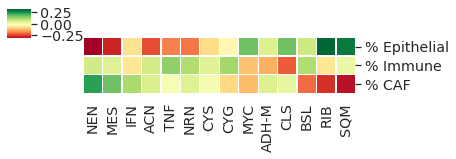

In [99]:
sns_plot = sns.clustermap(jason_malig_correlations,cmap="RdYlGn", linewidths = .25, linecolor='white', figsize=(6.5, 2.26), center = 0)
sns_plot.ax_row_dendrogram.set_visible(False)
sns_plot.ax_col_dendrogram.set_visible(False)
sns_plot.savefig("malignant_proportion_correlations.pdf")

Misc

In [115]:
summ_table_HR = {'NRN': [1.62],
        'SQM': [1.35],
        'MES': [1.18],
        'ACN': [1.09],
        'NEN': [0.87],
        'BSL': [0.75],
        'CLS': [0.61]
        }

summ_table_HR = pd.DataFrame(summ_table_HR, columns = ['NRN','SQM', 'MES', 'ACN','NEN', 'BSL', 'CLS'], index=['Hazard Ratio (TPP)'])

print (summ_table_HR)

                     NRN   SQM   MES   ACN   NEN   BSL   CLS
Hazard Ratio (TPP)  1.62  1.35  1.18  1.09  0.87  0.75  0.61


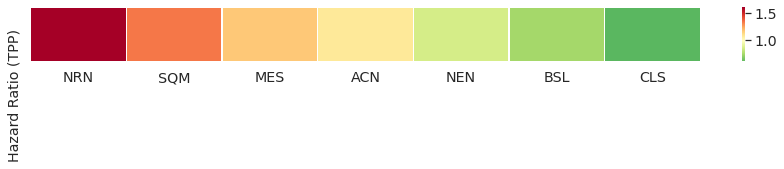

In [126]:
fig, ax = plt.subplots(figsize=(15,1)) 
sns_plot = sns.heatmap(summ_table_HR,cmap="RdYlGn_r", linewidths = .25, linecolor='white', center = 1)
sns_plot.figure.savefig("summ_table.pdf")

In [49]:
immune = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation']=='Myeloid')|(combinenaivedata.obs['Level 1 Annotation']=='Lymphoid')]

In [54]:
p2t = dict((p, t) for p, t in zip(combinenaivedata.obs.pid, combinenaivedata.obs.new_treatment))

df = combinenaivedata.obs.groupby(['pid', 'Level 1 Annotation']).agg({'new_treatment':'first', 'total_counts':'count'}).reset_index()
total = combinenaivedata.obs.groupby(['pid', 'new_treatment']).agg({'total_counts':'count'}).to_dict()['total_counts']
df['overall'] = [total.get((pid, treatment), 0) for pid, treatment in zip(df['pid'], df['new_treatment'])]
df['new_treatment']= [p2t.get(p) for p in df['pid']]
df = df[~df.overall.isna()]
df['normalized'] = df['total_counts']/df['overall']
df.columns = ['pid','cell_type','treatment','total_counts','overall','normalized']
df

pid                     cell_type  treatment  total_counts  overall  \
0    T1                     Adipocyte        CRT             0        0   
1    T1  Cancer-associated fibroblast        CRT           104     2002   
2    T1                     Endocrine        CRT           486     2002   
3    T1                   Endothelial        CRT           222     2002   
4    T1    Epithelial (non-malignant)        CRT           651     2002   
..   ..                           ...        ...           ...      ...   
468  U9                      Lymphoid  Untreated            19     3033   
469  U9                       Myeloid  Untreated           154     3033   
470  U9                      Pericyte  Untreated           301     3033   
471  U9                       Schwann  Untreated            14     3033   
472  U9        Vascular smooth muscle  Untreated             3     3033   

     normalized  
0           NaN  
1      0.051948  
2      0.242757  
3      0.110889  
4      0.325175  
..          ...  
468    0.006264  
469    0.050775  
470    0.099242  
471    0.004616  
472    0.000989  

[473 rows x 6 columns]

In [55]:
#df = df.set_index(['pid', 'cell_type']).reset_index()
for topic in set(df.cell_type):
    for treatmentstatus1 in set(df.treatment):
        for treatmentstatus2 in set(df.treatment):
            if treatmentstatus1!=treatmentstatus2:
                data1 = df[(df.treatment==treatmentstatus1)&(df['cell_type']==topic)]
                data2 = df[(df.treatment==treatmentstatus2)&(df['cell_type']==topic)]
                data1['normalized'] = data1['normalized'].fillna(0)
                data2['normalized'] = data2['normalized'].fillna(0)
                U1, p = mannwhitneyu(data1['normalized'].values, data2['normalized'].values)
                if p < .05:
                    print(treatmentstatus1, treatmentstatus2, topic, U1, p)
                    
                

CRTl CRT Cancer-associated fibroblast 15.0 0.03551002800914358
CRT CRTl Cancer-associated fibroblast 15.0 0.03551002800914358
CRTl Untreated Myeloid 22.0 0.04676625634454656
CRTl CRT Myeloid 7.0 0.005448177097693718
CRTl Other Myeloid 2.0 0.011239436683062633
Untreated CRTl Myeloid 22.0 0.04676625634454656
CRT CRTl Myeloid 7.0 0.005448177097693718
Other CRTl Myeloid 2.0 0.011239436683062633
CRTl Untreated Vascular smooth muscle 24.0 0.04578160991998368
CRTl CRT Vascular smooth muscle 15.0 0.028157242669974502
Untreated CRTl Vascular smooth muscle 24.0 0.04578160991998368
CRT CRTl Vascular smooth muscle 15.0 0.028157242669974502
CRTl CRT Lymphoid 15.0 0.03551002800914358
CRTl Other Lymphoid 0.0 0.00405655863278289
CRT CRTl Lymphoid 15.0 0.03551002800914358
Other CRTl Lymphoid 0.0 0.00405655863278289
Untreated CRT Pericyte 77.0 0.03271106045057955
Untreated Other Pericyte 19.0 0.010724110021675809
CRT Untreated Pericyte 77.0 0.03271106045057955
Other Untreated Pericyte 19.0 0.01072411002

<ipython-input-55-9ba75baef0f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-55-9ba75baef0f7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


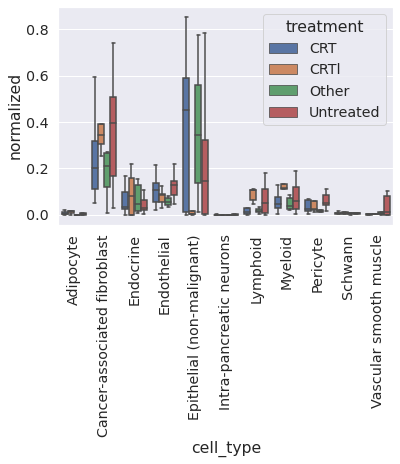

In [56]:
sns.boxplot(data=df, x='cell_type', y='normalized', hue='treatment', showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [59]:
df = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/Immune_enumeration.csv')
#df = df.set_index(['pid', 'cell_type']).reset_index()
for topic in set(df.cell_type):
    for treatmentstatus1 in set(df.treatment):
        for treatmentstatus2 in set(df.treatment):
            if treatmentstatus1!=treatmentstatus2:
                data1 = df[(df.treatment==treatmentstatus1)&(df['cell_type']==topic)]
                data2 = df[(df.treatment==treatmentstatus2)&(df['cell_type']==topic)]
                data1['normalized'] = data1['normalized'].fillna(0)
                data2['normalized'] = data2['normalized'].fillna(0)
                U1, p = mannwhitneyu(data1['normalized'].values, data2['normalized'].values)
                if p < .05:
                    print(treatmentstatus1, treatmentstatus2, topic, U1, p)

Untreated Other NK 22.0 0.03894107087447789
CRT Other NK 21.0 0.04543640479388295
Other Untreated NK 22.0 0.03894107087447789
Other CRT NK 21.0 0.04543640479388295
CRT CRTL CD4+ T 10.0 0.010006309359522804
CRTL CRT CD4+ T 10.0 0.010006309359522804
CRTL Other CD4+ T 5.0 0.04141871257940315
Other CRTL CD4+ T 5.0 0.04141871257940315
Untreated CRTL Neutrophil 9.0 0.0013266539105033408
CRT CRTL Neutrophil 12.0 0.010202312583990543
CRTL Untreated Neutrophil 9.0 0.0013266539105033408
CRTL CRT Neutrophil 12.0 0.010202312583990543
Untreated CRTL B 18.0 0.04798370238845443
Untreated Other B 23.0 0.046018561451290844
CRTL Untreated B 18.0 0.04798370238845443
Other Untreated B 23.0 0.046018561451290844
Untreated CRTL CD8+ T 9.0 0.007188088023881404
CRT CRTL CD8+ T 5.0 0.0031098020474816693
CRT Other CD8+ T 20.0 0.03786952899324111
CRTL Untreated CD8+ T 9.0 0.007188088023881404
CRTL CRT CD8+ T 5.0 0.0031098020474816693
CRTL Other CD8+ T 4.0 0.027617126859031914
Other CRT CD8+ T 20.0 0.0378695289932

<ipython-input-59-ad0b4d5e7243>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['normalized'].fillna(0)
<ipython-input-59-ad0b4d5e7243>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['normalized'].fillna(0)


In [60]:
df = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/Lymphoid_enumeration.csv')
#df = df.set_index(['pid', 'cell_type']).reset_index()
for topic in set(df.cell_type):
    for treatmentstatus1 in set(df.treatment):
        for treatmentstatus2 in set(df.treatment):
            if treatmentstatus1!=treatmentstatus2:
                data1 = df[(df.treatment==treatmentstatus1)&(df['cell_type']==topic)]
                data2 = df[(df.treatment==treatmentstatus2)&(df['cell_type']==topic)]
                data1['normalized'] = data1['proportion'].fillna(0)
                data2['normalized'] = data2['proportion'].fillna(0)
                U1, p = mannwhitneyu(data1['normalized'].values, data2['normalized'].values)
                if p < .05:
                    print(treatmentstatus1, treatmentstatus2, topic, U1, p)

CRT CRTL CD4+ T 12.0 0.016330556438198033
CRTL CRT CD4+ T 12.0 0.016330556438198033
Untreated CRT Natural killer 66.5 0.04789146981553024
Untreated Other Natural killer 15.0 0.010398998652768412
CRT Untreated Natural killer 66.5 0.04789146981553024
CRTL Other Natural killer 3.0 0.017881883295488944
Other Untreated Natural killer 15.0 0.010398998652768412
Other CRTL Natural killer 3.0 0.017881883295488944
Untreated CRTL B 15.0 0.02695384119832264
Untreated Other B 23.0 0.046018561451290844
CRTL Untreated B 15.0 0.02695384119832264
Other Untreated B 23.0 0.046018561451290844
Untreated CRTL CD8+ T 13.0 0.01809030837216082
CRTL Untreated CD8+ T 13.0 0.01809030837216082


<ipython-input-60-851d4872c744>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normalized'] = data1['proportion'].fillna(0)
<ipython-input-60-851d4872c744>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normalized'] = data2['proportion'].fillna(0)


In [ ]:
lymphoid_df = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/Lymphoid_enumeration.csv')

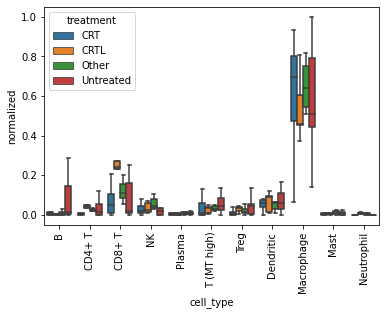

In [13]:
sns.boxplot(data=immune_df, x='cell_type', y='normalized', hue='treatment', showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [6]:
immune_df

pid  treatment   cell_type  total_counts  overall  normalized
0    MGHR5        CRT           B             2      495    0.004040
1    MGHR5        CRT      CD4+ T             0      495    0.000000
2    MGHR5        CRT      CD8+ T             5      495    0.010101
3    MGHR5        CRT          NK             4      495    0.008081
4    MGHR5        CRT      Plasma             1      495    0.002020
..     ...        ...         ...           ...      ...         ...
447     11  Untreated        Treg             0      173    0.000000
448     11  Untreated   Dendritic             4      173    0.023121
449     11  Untreated  Macrophage           150      173    0.867052
450     11  Untreated        Mast             0      173    0.000000
451     11  Untreated  Neutrophil             0      173    0.000000

[452 rows x 6 columns]

In [ ]:
Untreated CRT Epithelial (non-malignant) 0.043670387009121216
CRTl CRT Myeloid 0.009881252423162868
Untreated CRTl Myeloid 0.002735713450332826
Untreated CRTl Endocrine 0.007958597253001206
Untreated CRT Endocrine 0.02359096381699488
Untreated CRTl Epithelial (malignant) 0.001913926207236879
Untreated CRT Epithelial (malignant) 0.0007065261838741609
CRTl Untreated Cancer-associated fibroblast 0.006566490867108918

In [76]:
sc.tl.rank_genes_groups(combinenaivedata, groupby='Level 1 Annotation', reference='Epithelial (non-malignant)')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


In [89]:
result = combinenaivedata.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals', 'logfoldchanges']})

df = df[['Epithelial (malignant)_n','Epithelial (malignant)_l']]

for g in ['IL1B', 'SRC', 'LDHA', 'CFTR']:
    display(df[df['Epithelial (malignant)_n'] == g])

Epithelial (malignant)_n  Epithelial (malignant)_l
8213                     IL1B                  1.216892

Epithelial (malignant)_n  Epithelial (malignant)_l
1258                      SRC                   1.01118

Epithelial (malignant)_n  Epithelial (malignant)_l
497                     LDHA                  1.976926

Epithelial (malignant)_n  Epithelial (malignant)_l
22161                     CFTR                 -5.677471

# compute dirichlet multinomial using scCODA

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Automatic reference selection! Reference cell type set to Schwann
Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (96.030 sec)
Acceptance rate: 76.6%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 32 samples, 12 cell types
Reference index: 10
Formula: treatment
Spike-and-slab threshold: 0.625

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 96.030 sec. Acceptance rate: 76.6%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.839  -2.170   -1.507  0.204   
Cancer-associated fibroblast            0.255  -0.056    0.548  0.190   
Endocrine                              -0.964  -1.276   -0.667  0.188   
Endothelial                            -0.223  -0.495    0.074  0.177   
Epithelial (malignant)                 -0.726  -1.118   -0.328  0.246   
Epithelial (non-malignant)             -0.739  -1.083   -0.399  0.211   
Intra-pancreatic neurons               -2.009  -2.347   -1.680  0.207   
Lymphoid                               -1.058  -1.358   -0.733  0.197   
Myeloid

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Automatic reference selection! Reference cell type set to Endothelial
Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (86.780 sec)
Acceptance rate: 55.8%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 23 samples, 12 cell types
Reference index: 3
Formula: treatment
Spike-and-slab threshold: 0.625

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 86.780 sec. Acceptance rate: 55.8%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.742  -2.300   -1.200  0.328   
Cancer-associated fibroblast            1.300   0.662    1.870  0.366   
Endocrine                              -0.840  -1.296   -0.259  0.310   
Endothelial                            -0.100  -0.386    0.203  0.182   
Epithelial (malignant)                 -0.356  -0.949    0.216  0.367   
Epithelial (non-malignant)             -0.947  -1.356   -0.538  0.262   
Intra-pancreatic neurons               -1.896  -2.401   -1.481  0.293   
Lymphoid                               -0.054  -0.862    0.719  0.474   
Myeloid 

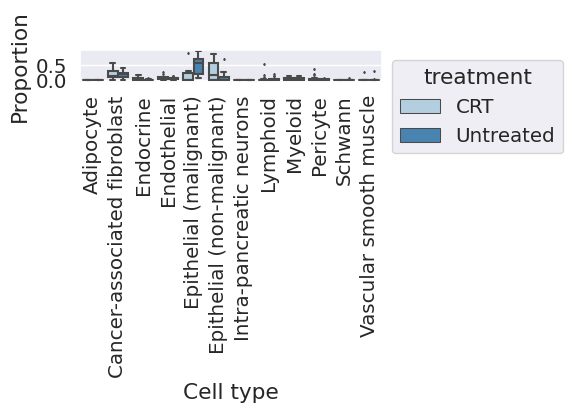

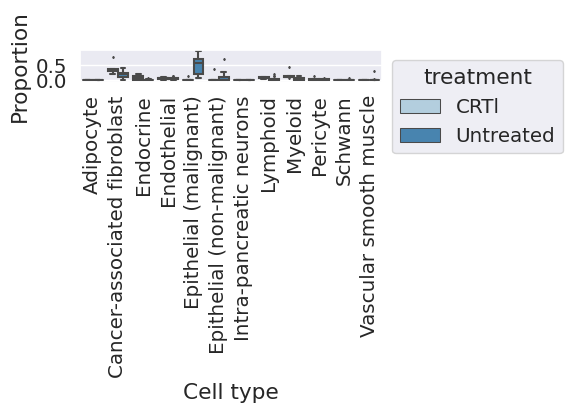

In [37]:
dirichlet_multinomial(combinenaivedata, 'Level 1 Annotation', "CRT", 'automatic')
dirichlet_multinomial(combinenaivedata, 'Level 1 Annotation', "CRTl", 'automatic')

nonmalignant CRT


/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Automatic reference selection! Reference cell type set to Schwann
Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (92.936 sec)
Acceptance rate: 66.1%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Compositional Analysis summary (extended):

Data: 32 samples, 11 cell types
Reference index: 9
Formula: treatment
Spike-and-slab threshold: 0.616

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 92.936 sec. Acceptance rate: 66.1%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.766  -2.126   -1.441  0.208   
Cancer-associated fibroblast            0.588   0.285    0.906  0.192   
Endocrine                              -0.780  -1.082   -0.451  0.193   
Endothelial                             0.063  -0.225    0.372  0.185   
Epithelial (non-malignant)             -0.524  -0.864   -0.193  0.203   
Intra-pancreatic neurons               -1.949  -2.267   -1.581  0.209   
Lymphoid                               -0.889  -1.224   -0.577  0.200   
Myeloid                                -0.464  -0.769   -0.173  0.184   
Pericyte

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 23 samples, 11 cell types
Reference index: 9
Formula: treatment
Spike-and-slab threshold: 0.616

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 84.488 sec. Acceptance rate: 46.2%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.615  -2.131   -1.115  0.309   
Cancer-associated fibroblast            1.340   0.861    1.845  0.313   
Endocrine                              -0.640  -1.080   -0.155  0.280   
Endothelial                             0.278  -0.075    0.645  0.226   
Epithelial (non-malignant)             -0.712  -1.079   -0.301  0.244   
Intra-pancreatic neurons               -1.788  -2.211   -1.293  0.283   
Lymphoid                               -0.170  -0.732    0.603  0.416   
Myeloid                                 0.293  -0.332    0.990  0.411   
Pericyte

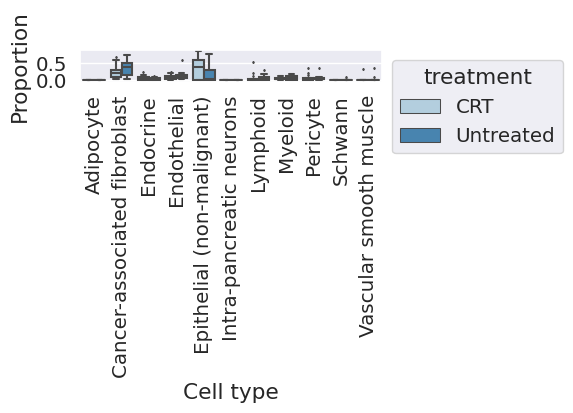

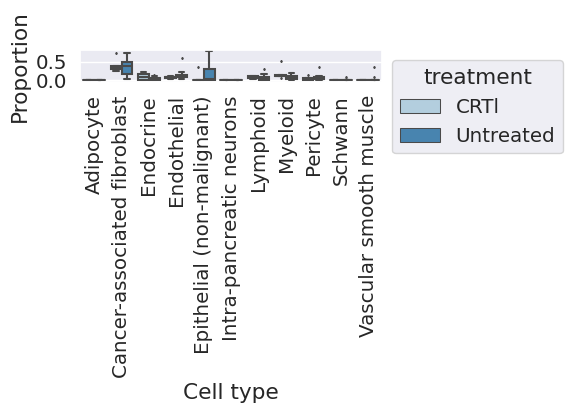

In [38]:
subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='Epithelial (malignant)']
print('nonmalignant', 'CRT')
dirichlet_multinomial(subset, 'Level 1 Annotation', "CRT", 'automatic')
print('nonmalignant', 'CRTl')
dirichlet_multinomial(subset, 'Level 1 Annotation', "CRTl", 'automatic')

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


MCMC sampling finished. (68.866 sec)
Acceptance rate: 0.0%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Compositional Analysis summary (extended):

Data: 29 samples, 4 cell types
Reference index: 2
Formula: treatment
Spike-and-slab threshold: 0.485

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 68.866 sec. Acceptance rate: 0.0%

Intercepts:
                   Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                                
ADM                          0.066   0.066    0.066  0.0              NaN
Acinar                      -1.000  -1.000   -1.000  0.0              NaN
Ductal                       1.331   1.331    1.331  0.0              NaN
Ductal (atypical)            0.766   0.766    0.766  0.0              NaN


Effects:
                                          Final Parameter  HDI 5%  HDI 95%  \
Covariate              Cell Type                                             
treatment[T.Untreated] ADM                       0.608694   0.609    0.609   
                       Acinar                   -0.

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


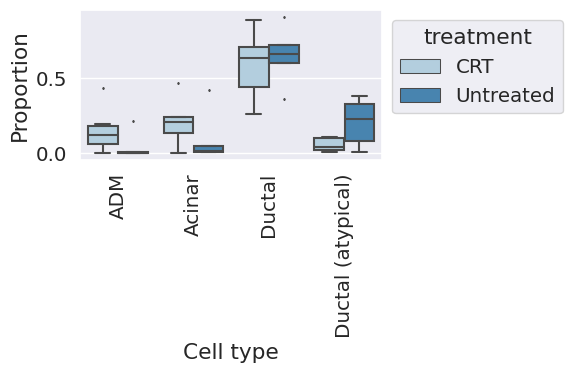

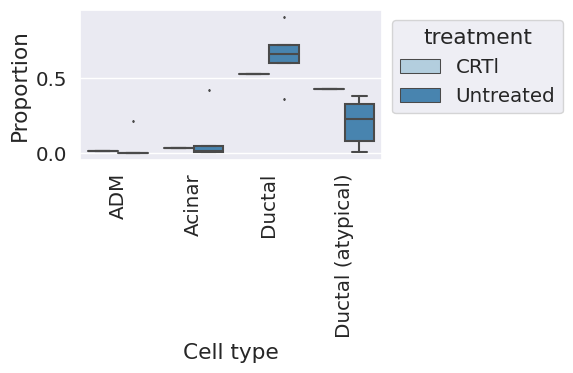

In [53]:
subset = combinenaivedata[combinenaivedata.obs['Level 1 Annotation'] == 'Epithelial (non-malignant)']
dirichlet_multinomial(subset, 'Level 2 Annotation', "CRT", 'Ductal')
dirichlet_multinomial(subset, 'Level 2 Annotation', "CRTl", 'Ductal')

# Immune

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


MCMC sampling finished. (72.541 sec)
Acceptance rate: 0.0%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Compositional Analysis summary (extended):

Data: 32 samples, 10 cell types
Reference index: 8
Formula: treatment
Spike-and-slab threshold: 0.605

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 72.541 sec. Acceptance rate: 0.0%

Intercepts:
                Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                             
B                        -0.567  -0.567   -0.567  0.0              NaN
CD4+ T                    0.259   0.259    0.259  0.0              NaN
CD8+ T                   -1.568  -1.568   -1.568  0.0              NaN
Dendritic                -0.033  -0.033   -0.033  0.0              NaN
Macrophage               -1.234  -1.234   -1.234  0.0              NaN
Mast                     -0.053  -0.053   -0.053  0.0              NaN
Natural killer            0.446   0.446    0.446  0.0              NaN
Neutrophil               -0.957  -0.957   -0.957  0.0              NaN
Plasma                   -1.2

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 23 samples, 10 cell types
Reference index: 8
Formula: treatment
Spike-and-slab threshold: 0.605

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 71.151 sec. Acceptance rate: 0.0%

Intercepts:
                Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                             
B                        -0.816  -0.816   -0.816  0.0              NaN
CD4+ T                    0.144   0.144    0.144  0.0              NaN
CD8+ T                   -0.631  -0.631   -0.631  0.0              NaN
Dendritic                 0.567   0.567    0.567  0.0              NaN
Macrophage               -1.602  -1.602   -1.602  0.0              NaN
Mast                      1.701   1.701    1.701  0.0              NaN
Natural killer            2.287   2.287    2.287  0.0              NaN
Neutrophil                0.958   0.958    0.958  0.0              NaN
Plasma                    1.3

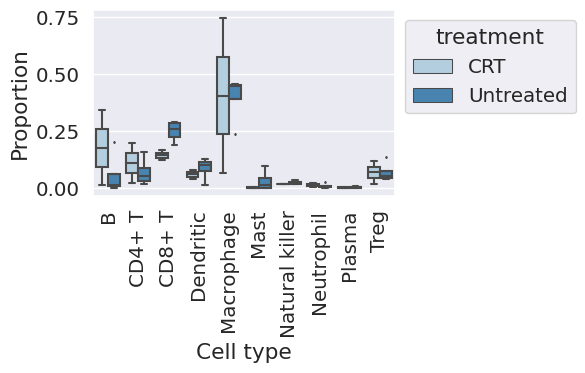

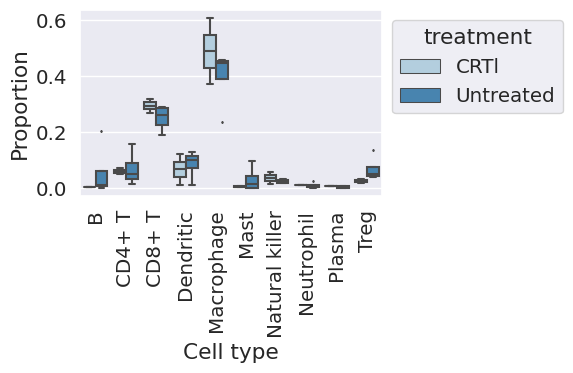

In [39]:
subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation'] == 'Myeloid') | (combinenaivedata.obs['Level 1 Annotation'] == 'Lymphoid')]
dirichlet_multinomial(subset, 'Level 2 Annotation', "CRT", 'Plasma')
dirichlet_multinomial(subset, 'Level 2 Annotation', "CRTl", 'Plasma')

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


MCMC sampling finished. (69.325 sec)
Acceptance rate: 0.0%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Compositional Analysis summary (extended):

Data: 32 samples, 4 cell types
Reference index: 2
Formula: treatment
Spike-and-slab threshold: 0.485

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 69.325 sec. Acceptance rate: 0.0%

Intercepts:
            Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                         
Dendritic            -0.330  -0.330   -0.330  0.0              NaN
Macrophage            2.400   2.400    2.400  0.0              NaN
Mast                  1.804   1.804    1.804  0.0              NaN
Neutrophil           -0.876  -0.876   -0.876  0.0              NaN


Effects:
                                   Final Parameter  HDI 5%  HDI 95%   SD  \
Covariate              Cell Type                                           
treatment[T.Untreated] Dendritic          0.344095   0.344    0.344  0.0   
                       Macrophage         0.117991   0.118    0.118  0.0   
                       

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 23 samples, 4 cell types
Reference index: 2
Formula: treatment
Spike-and-slab threshold: 0.485

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 67.120 sec. Acceptance rate: 0.0%

Intercepts:
            Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                         
Dendritic             0.856   0.856    0.856  0.0              NaN
Macrophage            0.050   0.050    0.050  0.0              NaN
Mast                 -0.987  -0.987   -0.987  0.0              NaN
Neutrophil            0.233   0.233    0.233  0.0              NaN


Effects:
                                   Final Parameter  HDI 5%  HDI 95%   SD  \
Covariate              Cell Type                                           
treatment[T.Untreated] Dendritic         -0.537390  -0.537   -0.537  0.0   
                       Macrophage         0.916346   0.916    0.916  0.0   
                       

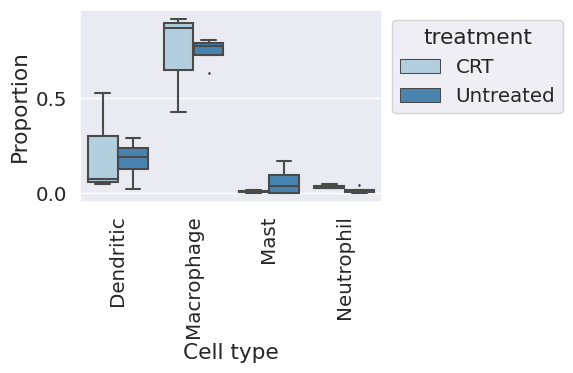

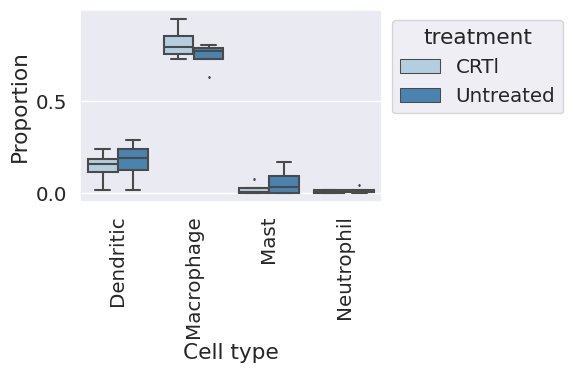

In [40]:
subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation'] == 'Myeloid')]
dirichlet_multinomial(subset, 'Level 2 Annotation', "CRT", 'Mast')
dirichlet_multinomial(subset, 'Level 2 Annotation', "CRTl", 'Mast')

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


MCMC sampling finished. (71.850 sec)
Acceptance rate: 0.0%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Compositional Analysis summary (extended):

Data: 29 samples, 6 cell types
Reference index: 4
Formula: treatment
Spike-and-slab threshold: 0.542

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 71.850 sec. Acceptance rate: 0.0%

Intercepts:
                Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                             
B                        -0.866  -0.866   -0.866  0.0              NaN
CD4+ T                    0.416   0.416    0.416  0.0              NaN
CD8+ T                    1.076   1.076    1.076  0.0              NaN
Natural killer           -0.484  -0.484   -0.484  0.0              NaN
Plasma                   -0.643  -0.643   -0.643  0.0              NaN
Treg                      0.770   0.770    0.770  0.0              NaN


Effects:
                                       Final Parameter  HDI 5%  HDI 95%   SD  \
Covariate              Cell Type                                               
t

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 20 samples, 6 cell types
Reference index: 4
Formula: treatment
Spike-and-slab threshold: 0.542

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 68.660 sec. Acceptance rate: 0.0%

Intercepts:
                Final Parameter  HDI 5%  HDI 95%   SD  Expected Sample
Cell Type                                                             
B                        -1.228  -1.228   -1.228  0.0              NaN
CD4+ T                    0.829   0.829    0.829  0.0              NaN
CD8+ T                    0.295   0.295    0.295  0.0              NaN
Natural killer           -2.653  -2.653   -2.653  0.0              NaN
Plasma                    1.177   1.177    1.177  0.0              NaN
Treg                      1.546   1.546    1.546  0.0              NaN


Effects:
                                       Final Parameter  HDI 5%  HDI 95%   SD  \
Covariate              Cell Type                                               
t

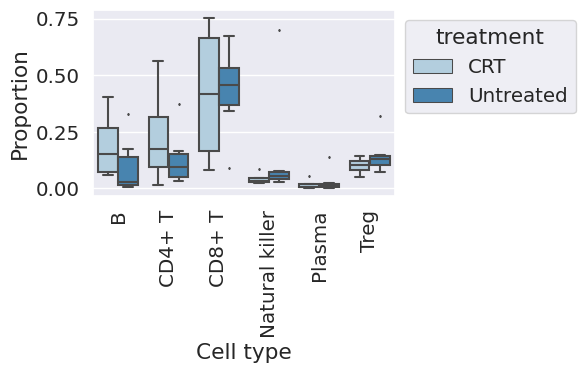

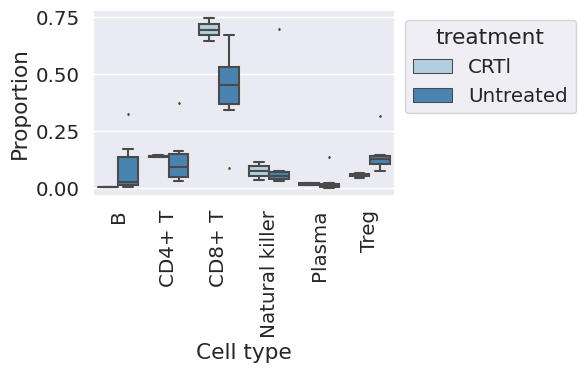

In [41]:
subset = combinenaivedata[(combinenaivedata.obs['Level 1 Annotation'] == 'Lymphoid')]
dirichlet_multinomial(subset, 'Level 2 Annotation', 'CRT', 'Plasma')
dirichlet_multinomial(subset, 'Level 2 Annotation', 'CRTl', 'Plasma')

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


MCMC sampling finished. (69.327 sec)
Acceptance rate: 0.0%


/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Compositional Analysis summary (extended):

Data: 30 samples, 4 cell types
Reference index: 2
Formula: treatment
Spike-and-slab threshold: 0.485

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 69.327 sec. Acceptance rate: 0.0%

Intercepts:
                                 Final Parameter  HDI 5%  HDI 95%   SD  \
Cell Type                                                                
Dendritic (activated)                     -0.325  -0.325   -0.325  0.0   
Dendritic (conventional type 1)            1.447   1.447    1.447  0.0   
Dendritic (conventional type 2)            0.665   0.665    0.665  0.0   
Dendritic (plasmacytoid)                  -0.356  -0.356   -0.356  0.0   

                                 Expected Sample  
Cell Type                                         
Dendritic (activated)                        NaN  
Dendritic (conventional type 1)              NaN  
Dendritic (conventional type 2)              NaN  
Dendritic (plasmacytoid)                

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Compositional Analysis summary (extended):

Data: 22 samples, 4 cell types
Reference index: 2
Formula: treatment
Spike-and-slab threshold: 0.485

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 67.063 sec. Acceptance rate: 0.0%

Intercepts:
                                 Final Parameter  HDI 5%  HDI 95%   SD  \
Cell Type                                                                
Dendritic (activated)                     -0.347  -0.347   -0.347  0.0   
Dendritic (conventional type 1)           -0.141  -0.141   -0.141  0.0   
Dendritic (conventional type 2)           -0.097  -0.097   -0.097  0.0   
Dendritic (plasmacytoid)                   0.773   0.773    0.773  0.0   

                                 Expected Sample  
Cell Type                                         
Dendritic (activated)                        NaN  
Dendritic (conventional type 1)              NaN  
Dendritic (conventional type 2)              NaN  
Dendritic (plasmacytoid)                

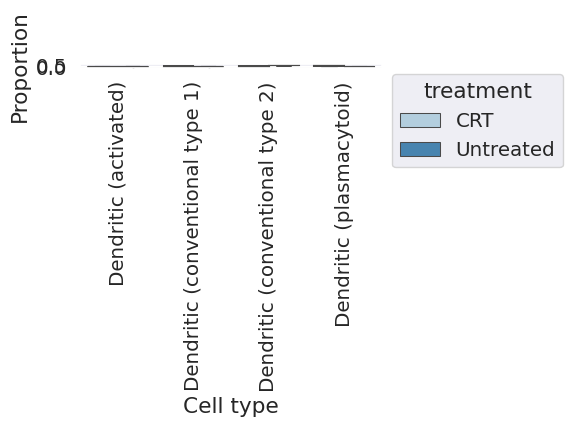

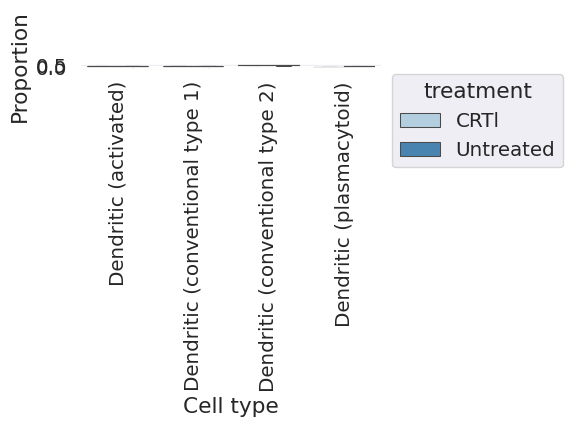

In [50]:
subset = combinenaivedata[(combinenaivedata.obs['Level 2 Annotation'] == 'Dendritic')]
dirichlet_multinomial(subset, 'Level 3 Annotation', "CRT", 'Dendritic (conventional type 2)')
dirichlet_multinomial(subset, 'Level 3 Annotation', "CRTl", 'Dendritic (conventional type 2)')